# RQ1: Who is the greatest scorer, playmaker, and defender in NBA history?

So, we're diving into the age-old debate: who's the ultimate baller when it comes to scoring, dishing out assists, and locking down on defence? We're talking about the big guns who've left their mark on the game. Armed with a bunch of stats we scraped from the NBA site using this cool tool called `nba_api`, we're on a mission to figure out who the real MVPs are in these three key areas. We'll be crunching numbers on shooting percentages, assist counts, and defensive stops to uncover the basketball gods who've made history. But hey, it's not just about settling arguments – we're hoping to drop some serious insights and maybe even change the way you see the game. So, grab your popcorn and let's dive into this amazing spectacle.
<br />

We will be using a customised metric system to find out who the top 10 players of all time are. These metrics consist of general stats, scoring stats and then defensive stats. Through analysis, we will be allocating points to each metric for each player. The players with the most points in each category will be awarded as the greatest in those categories.
<br />


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import plotly.express as px


sns.set_context('talk', font_scale=0.8)

Firstly, let us load the relevant datasets and inspect them to see what data we are dealing with and what insights we can gain from our data:

In [73]:


playerStats = pd.read_csv('../data/cleaned/players_data/player_stats.csv')
teamStats = pd.read_csv('../data/cleaned/team_regSeason_data/team_regSeason_stats.csv')
collegeStats = pd.read_csv('../data/cleaned/player_college_data/player_college_stats.csv')
playerInfo = pd.read_csv('../data/cleaned/draft_data/draft_data.csv')





Lets have a look at the datasets, to explore the attributes for each player and team.

In [74]:
playerStats

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1985-86,0,22.0,82,1.0,...,0.611,160.0,221.0,381.0,54,49.0,49.0,99.0,229,521
1,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1986-87,0,23.0,79,72.0,...,0.780,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852
2,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1987-88,0,24.0,82,64.0,...,0.773,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937
3,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1988-89,0,25.0,82,82.0,...,0.786,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088
4,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1989-90,0,26.0,82,82.0,...,0.751,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26739,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2008-09,0,34.0,65,65.0,...,0.799,157.0,333.0,490.0,64,28.0,84.0,90.0,183,838
26740,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2009-10,0,35.0,64,6.0,...,0.743,114.0,231.0,345.0,48,14.0,50.0,63.0,183,474
26741,980,Zydrunas Ilgauskas,1610612748,Miami Heat,MIA,2010-11,0,36.0,72,51.0,...,0.783,108.0,179.0,287.0,26,23.0,58.0,52.0,185,360
26742,1629597,Zylan Cheatham,1610612740,New Orleans Pelicans,NOP,2019-20,0,24.0,4,0.0,...,0.000,3.0,6.0,9.0,3,1.0,1.0,4.0,10,12


In [75]:
playerStats.describe()

,player_id,team_id,league_id,age,games_played,games_started,minutes_played,field_goals_made,field_goals_attempted,field_goal_pct,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
count,2.674400e+04,2.674400e+04,26744.0,26744.000000,26744.000000,21281.000000,26439.000000,26744.000000,26744.000000,26739.000000,...,26648.000000,23400.000000,23400.000000,26520.000000,26744.000000,23400.000000,23400.000000,22326.000000,26744.000000,26744.000000
mean,2.458131e+05,1.610613e+09,0.0,26.950381,49.138311,23.228608,1169.315141,192.091460,421.015555,0.432246,...,0.695418,58.484188,145.187350,217.825452,112.942754,38.165256,23.694444,69.908403,110.407007,504.131020
std,4.948763e+05,8.693252e+00,0.0,3.957526,26.826570,28.407622,935.328609,187.840641,396.708140,0.106064,...,0.199745,65.694020,145.489989,224.707497,135.283218,37.796460,35.637607,66.795408,83.761343,494.848789
min,2.000000e+00,1.610613e+09,0.0,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.760000e+03,1.610613e+09,0.0,24.000000,25.000000,0.000000,299.500000,37.000000,90.000000,0.395000,...,0.645000,11.000000,31.000000,47.000000,17.000000,8.000000,3.000000,15.000000,34.000000,98.000000
50%,7.706300e+04,1.610613e+09,0.0,26.000000,55.000000,8.000000,1002.000000,136.000000,307.000000,0.440000,...,0.742000,34.000000,104.000000,154.000000,66.000000,28.000000,11.000000,51.000000,100.000000,354.000000
75%,2.012290e+05,1.610613e+09,0.0,30.000000,74.000000,45.000000,1919.000000,294.000000,649.000000,0.484000,...,0.811000,84.000000,211.000000,311.000000,158.000000,57.000000,29.000000,106.000000,174.000000,772.000000
max,1.641931e+06,1.610613e+09,0.0,50.000000,82.000000,82.000000,3882.000000,1597.000000,3159.000000,1.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


In [76]:
teamStats

,team_id,team_name,team_city,team_nickname,season,games_played,wins,losses,win_pct,conference_rank,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,personal_fouls,steals,turnovers,blocks,points,points_rank
0,1610612737,Atlanta Hawks,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,...,0,0,0,1330,2057,0,0,0,5313,10
1,1610612737,Atlanta Hawks,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,...,0,0,0,1476,2092,0,0,0,5730,3
2,1610612737,Atlanta Hawks,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,...,0,0,0,1229,1848,0,0,0,4833,10
3,1610612737,Atlanta Hawks,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,...,0,0,0,1427,2120,0,0,0,5389,9
4,1610612737,Atlanta Hawks,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,...,0,0,0,1298,1771,0,0,0,5038,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,1610612764,Washington Wizards,Washington,Wizards,2019-20,72,25,47,0.347,9,...,732,2295,3027,1801,1634,574,1020,309,8238,8
1623,1610612764,Washington Wizards,Washington,Wizards,2020-21,72,34,38,0.472,0,...,697,2557,3254,1835,1555,528,1036,297,8398,3
1624,1610612764,Washington Wizards,Washington,Wizards,2021-22,82,35,47,0.427,12,...,737,2798,3535,2052,1545,522,1077,406,8907,22
1625,1610612764,Washington Wizards,Washington,Wizards,2022-23,82,35,47,0.427,12,...,774,2804,3578,2083,1539,561,1158,424,9279,21


In [77]:
teamStats.describe()

,team_id,games_played,wins,losses,win_pct,conference_rank,division_rank,playoff_wins,playoff_losses,conference_count,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,personal_fouls,steals,turnovers,blocks,points,points_rank
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1424.000000,...,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,1.610613e+09,79.709896,39.939152,39.770744,0.501169,6.162262,3.225569,2.653350,2.642286,13.542135,...,841.216964,2088.260602,2929.477566,1855.901659,1814.266749,548.930547,1070.135833,340.814382,8283.969269,12.946527
std,8.686354e+00,5.984249,12.288030,12.338190,0.149228,4.528926,1.759916,4.013392,2.708445,1.965170,...,402.145328,926.209268,1293.519391,277.513680,253.044617,254.879569,500.216357,165.076318,1012.552523,8.189422
min,1.610613e+09,48.000000,7.000000,9.000000,0.106000,0.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,335.000000,934.000000,0.000000,0.000000,0.000000,3303.000000,1.000000
25%,1.610613e+09,82.000000,31.000000,30.000000,0.390000,2.000000,2.000000,0.000000,0.000000,12.000000,...,757.000000,2257.500000,3222.000000,1710.000000,1666.500000,532.000000,1041.000000,311.000000,7936.000000,6.000000
50%,1.610613e+09,82.000000,41.000000,39.000000,0.512000,6.000000,3.000000,0.000000,3.000000,15.000000,...,942.000000,2440.000000,3448.000000,1874.000000,1833.000000,622.000000,1203.000000,380.000000,8423.000000,12.000000
75%,1.610613e+09,82.000000,49.000000,49.000000,0.610000,10.000000,5.000000,4.000000,4.000000,15.000000,...,1106.000000,2583.000000,3620.000000,2043.000000,1991.500000,700.000000,1352.500000,441.000000,8907.500000,19.500000
max,1.610613e+09,82.000000,73.000000,73.000000,0.890000,15.000000,8.000000,16.000000,11.000000,15.000000,...,1520.000000,3316.000000,4452.000000,2575.000000,2470.000000,1059.000000,2011.000000,716.000000,10371.000000,30.000000


In [78]:
collegeStats

,player_id,player_name,college,games_played,minutes_played,field_goals_made,field_goals_attempted,field_goal_pct,three_pointers_made,three_pointers_attempted,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,76984,Brian Heaney,Acadia (CAN),14,70.0,13,24,0.541666,NaN,NaN,...,0.500000,NaN,NaN,4.0,6,NaN,NaN,NaN,17,28
1,78385,Bill Turner,Akron,294,4060.0,603,1481,0.407157,NaN,NaN,...,0.728119,NaN,NaN,1039.0,167,NaN,NaN,NaN,605,1597
2,77684,Fred Nagy,Akron,50,NaN,94,271,0.346863,NaN,NaN,...,0.670103,NaN,NaN,NaN,68,NaN,NaN,NaN,84,253
3,76669,Ned Endress,Akron,16,NaN,3,25,0.120000,NaN,NaN,...,0.533333,NaN,NaN,NaN,4,NaN,NaN,NaN,13,14
4,202148,Mickell Gladness,Alabama A&M,26,252.0,25,59,0.423728,0.0,0.0,...,0.500000,14.0,44.0,58.0,5,4.0,20.0,7.0,32,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,201,Chris Dudley,Yale,886,16319.0,1391,3380,0.411538,0.0,5.0,...,0.458222,2234.0,3223.0,5457.0,375,334.0,1027.0,740.0,2328,3473
4085,77346,Tony Lavelli,Yale,86,NaN,194,529,0.366729,NaN,NaN,...,0.852941,NaN,NaN,59.0,63,NaN,NaN,NaN,163,591
4086,1629671,Miye Oni,Yale,80,673.0,49,140,0.350000,38.0,115.0,...,0.750000,29.0,79.0,108.0,37,15.0,10.0,21.0,77,145
4087,76855,Butch Graves,Yale,4,11.0,2,6,0.333333,0.0,1.0,...,0.200000,0.0,2.0,2.0,1,1.0,0.0,1.0,4,5


In [79]:
collegeStats.describe()

,player_id,games_played,minutes_played,field_goals_made,field_goals_attempted,field_goal_pct,three_pointers_made,three_pointers_attempted,three_point_pct,free_throws_made,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
count,4.089000e+03,4089.000000,3800.000000,4089.000000,4089.000000,4089.000000,2952.000000,2952.000000,2737.000000,4089.000000,...,4089.000000,3221.000000,3221.000000,3840.000000,4089.000000,3221.000000,3221.000000,3042.000000,4089.000000,4089.000000
mean,3.429976e+05,270.273416,6731.103421,1048.581560,2315.757153,0.406422,157.170393,444.769648,0.224345,539.919296,...,0.667958,344.140950,842.934182,1232.940625,618.744436,228.593294,135.811549,416.872452,610.654928,2750.549523
std,5.869076e+05,308.267580,9280.052381,1688.491194,3609.099992,0.113714,343.850223,925.067522,0.161967,961.568012,...,0.206379,568.957779,1316.340496,2023.591436,1165.355853,347.831113,289.022377,620.151222,807.384956,4456.377349
min,2.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.617900e+04,31.000000,276.750000,33.000000,90.000000,0.362745,0.000000,4.000000,0.000000,16.000000,...,0.618181,13.000000,32.000000,44.000000,17.000000,9.000000,4.000000,18.000000,35.000000,86.000000
50%,7.758300e+04,130.000000,2054.500000,246.000000,602.000000,0.422283,9.000000,37.500000,0.272200,118.000000,...,0.714285,93.000000,239.000000,328.000000,126.000000,69.000000,29.000000,127.500000,203.000000,641.000000
75%,2.021300e+05,453.000000,10374.500000,1348.000000,3051.000000,0.464471,117.000000,369.750000,0.345161,627.000000,...,0.783917,424.000000,1144.000000,1609.000000,665.000000,313.000000,138.000000,567.250000,942.000000,3512.000000
max,1.641998e+06,1541.000000,54852.000000,13528.000000,26210.000000,1.000000,3719.000000,8745.000000,1.000000,9787.000000,...,1.000000,4526.000000,11406.000000,23924.000000,15806.000000,3265.000000,3830.000000,4524.000000,4578.000000,36928.000000


Let us start by looking at the distribution of the player's age in the NBA. This will give us an interesting insight into the demographic of players we are dealing with. A higher age means that players can be more likely to have higher longevity.



Text(0, 0.5, 'Number of Players')

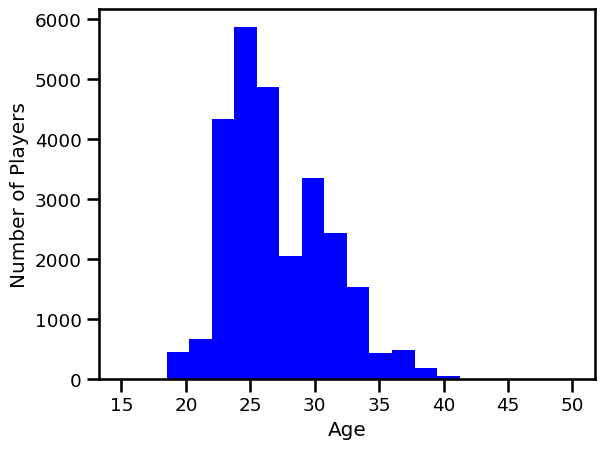

In [80]:
plt.hist(playerStats['age'], bins=20, color='blue')

# Add labels to the x-axis and y-axis
plt.xlabel('Age') 
plt.ylabel('Number of Players')  

As we can see here, the graph is skewed to the left, indicating that most players that have played in the NBA do not have high longevity. This could be for a variety of reasons, including:

<br>

1)the players skill level is not good enough to last long in the NBA. The NBA is a business and if a player does not perform they can easily be left without a team at the end of a season if they get waived(contract terminated).

<br>

2)the players' health management from the older eras was not as advanced as it is now. Players have better facilities and injury prevention systems right now, and their diets are also better. These all contribute to them having a better chance of staying fit and healthy for longer. 

<br>

3)Players get paid extravagantly high amounts of money in the NBA, this means that if they don't have high aspirations on a personal level, they can choose to retire early after getting their big paycheck
<br>

## Offensive Stats
**SCORING**
<br>
Now, let us get started on our analysis. We'll start off with the offensive side to a player's game, which consists of scoring and playmaking. The approach here for scoring is to retrieve the 20 best scorers of all time and then dive deeper into some advanced scoring stats. Let us retrieve the top 20 best scorers of all time, with regards to their points scored in their careers:

In [81]:
total_points_by_player = playerStats.groupby('player_name')['points'].sum()
top_20_players_points = total_points_by_player.nlargest(20)

top_20_players_points

player_name
LeBron James           40264
Kareem Abdul-Jabbar    38387
Karl Malone            36928
Kobe Bryant            33643
Michael Jordan         32292
Dirk Nowitzki          31560
Wilt Chamberlain       31419
Eddie Johnson          29365
Kevin Durant           28739
Shaquille O'Neal       28596
Carmelo Anthony        28289
Moses Malone           27409
Elvin Hayes            27313
Hakeem Olajuwon        26946
Oscar Robertson        26710
Dominique Wilkins      26668
Tim Duncan             26496
Paul Pierce            26397
John Havlicek          26395
Kevin Garnett          26071
Name: points, dtype: int64

Let us visualise this information to gain a better understanding.

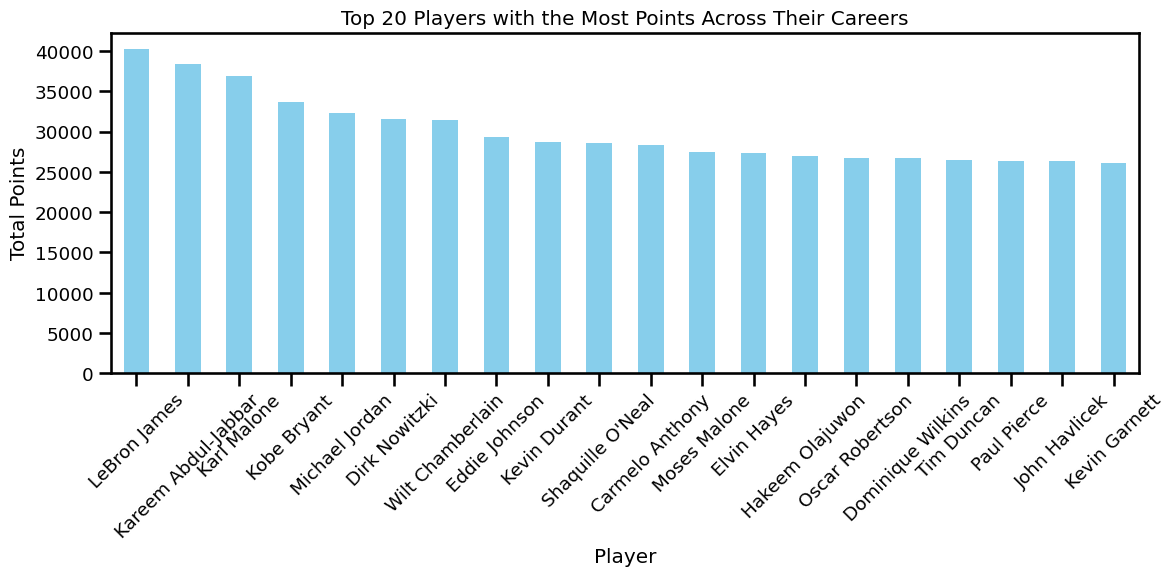

In [82]:
plt.figure(figsize=(12, 6))
top_20_players_points.plot(kind='bar', color='skyblue')
plt.title('Top 20 Players with the Most Points Across Their Careers')
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is a very interesting list, but not very surprising to a basketball fan. 

<br>

With regards to points, each player that ranks top in the metric gets 20 points, and the 2nd best gets 19, the 3rd best gets 18, and so on....

<br>

---POINTS---

<br>

LeBron James           20



Kareem Abdul-Jabbar    19


Karl Malone            18


Kobe Bryant            17


Michael Jordan         16


Dirk Nowitzki          15


Wilt Chamberlain       14

Eddie Johnson          13


Kevin Durant           12


Shaquille O'Neal       11



Carmelo Anthony        10



Moses Malone           9



Elvin Hayes            8



Hakeem Olajuwon        7



Oscar Robertson        6


Dominique Wilkins      5



Tim Duncan             4



Paul Pierce            3



John Havlicek          2



Kevin Garnett          1


Let us check if the top 20 scorers of all time are different if we rank them by their Points-Per-Game(PPG):

In [83]:
#get total points and total games played for each player
total_points_by_player = playerStats.groupby('player_name')['points'].sum()
total_games_by_player = playerStats.groupby('player_name')['games_played'].sum()

# Calculate PPG
ppg_by_player = total_points_by_player / total_games_by_player

sorted_players = ppg_by_player.sort_values(ascending=False)
top_20_playersPPG = sorted_players.head(20)

top_20_playersPPG

player_name
Michael Jordan       30.123134
Wilt Chamberlain     30.066029
Luka Doncic          28.586294
Joel Embiid          27.848131
Elgin Baylor         27.362884
Kevin Durant         27.292498
LeBron James         27.113805
Jerry West           27.030043
Allen Iverson        26.660832
Bob Pettit           26.363636
George Gervin        26.179520
Oscar Robertson      25.682692
Trae Young           25.579208
Damian Lillard       25.131422
Karl Malone          25.018970
Kobe Bryant          24.994799
Donovan Mitchell     24.859611
Dominique Wilkins    24.830540
Stephen Curry        24.749210
Zion Williamson      24.727273
dtype: float64

Lets graph this data again:

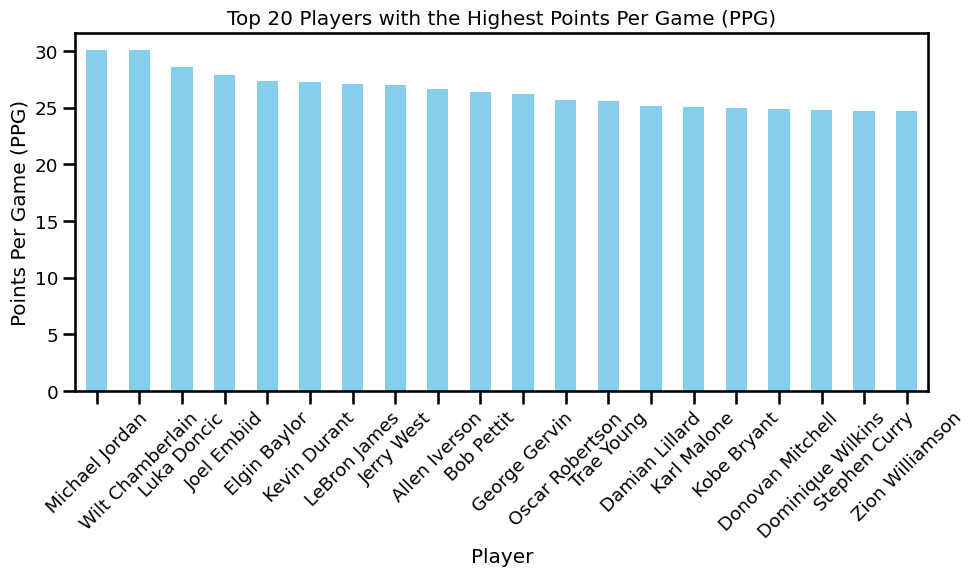

In [135]:
plt.figure(figsize=(10, 6))
top_20_playersPPG.plot(kind='bar', color='skyblue')
plt.title('Top 20 Players with the Highest Points Per Game (PPG)')
plt.xlabel('Player')
plt.ylabel('Points Per Game (PPG)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As expected, we get an almost completely different list here if we retrieve the top 20 scorers based off their PPG. This is due to alot of reasons. Alot of players have not played the same amount of seasons as others. For example, players like Luka Doncic and Joel Embiid have played less than 10 seasons in their careers but are still phenomenal scorers. The fact that they dont have the total points in their careers to compete with alot of the players who have finished their careeers should not be a valid reason to not put them up as one of the greatest scorers of all time. It makes perfect sense to use PPG as the main scoring metric. However, players like Dirk Nowitzki and Shaquille O'Neal(aka Shaq) should not be ignored because of their lower PPG, as their game had way more to it than scoring. So what we will do is we'll use the players in both lists(all time points and all time top PPG) as our main players for analysis. 

<br>


---POINTS---

<br>

Michael Jordan       20 + 16 = 36


Wilt Chamberlain     19 + 14 = 33


Luka Doncic          18 


Joel Embiid          17


Elgin Baylor         16


Kevin Durant         15 + 12 = 27


LeBron James         14 + 20 = 34


Jerry West           13


Allen Iverson        12


Bob Pettit           11


George Gervin        10


Oscar Robertson      9


Trae Young           8


Damian Lillard       7


Karl Malone          6 + 18 = 24


Kobe Bryant          5 + 17 = 22


Donovan Mitchell     4


Dominique Wilkins    3 + 5 = 8


Stephen Curry        2


Zion Williamson      1


Let us dive deeper into the scoring stats now:

<br>
1)Field Goal Percentage (FG%): the ratio of field goals made(FGM) to field goals attempted(FGA). A field goal is basically a shot attempt. FG% = FGA / FGM. Let us retrieve the FG% for these players.

In [137]:
#get a list of the top 20 players with the most points
top_20_players = top_20_players_points.index


#get a list of the top 20 players with the highest PPG
top_20_players_PPG = top_20_playersPPG.index

#Add all players to same list, except players that are in both lists to be added only once
top_scorers = top_20_players.union(top_20_players_PPG)
print(top_scorers)
len(top_scorers)


Index(['LeBron James', 'Karl Malone', 'Kobe Bryant', 'Michael Jordan',
       'Wilt Chamberlain', 'Kevin Durant', 'Oscar Robertson',
       'Dominique Wilkins'],
      dtype='object', name='player_name')

Okay, so now we know we are working with 32 players to see which of these players are the best scorers of all time. Now let's calculate their FG%:

In [86]:
fg_percent_dict = {}

# Iterate over each player in the top_scorers list
for player in top_scorers:
    fg_made = playerStats[playerStats['player_name'] == player]['field_goals_made'].sum()
    fg_attempted = playerStats[playerStats['player_name'] == player]['field_goals_attempted'].sum()
    
    # Calculate FG%
    fg_percent = fg_made / fg_attempted
    
    fg_percent_dict[player] = fg_percent

#print FG% for each player
for player, fg_percent in fg_percent_dict.items():
    print(f"Player: {player}, FG%: {fg_percent}")


Player: Allen Iverson, FG%: 0.42534914096252385
Player: Bob Pettit, FG%: 0.4355737316263632
Player: Carmelo Anthony, FG%: 0.44689307953893037
Player: Damian Lillard, FG%: 0.43821384784151773
Player: Dirk Nowitzki, FG%: 0.47059071374399597
Player: Dominique Wilkins, FG%: 0.46148501551716153
Player: Donovan Mitchell, FG%: 0.4501427630133978
Player: Eddie Johnson, FG%: 0.47352502318828893
Player: Elgin Baylor, FG%: 0.4309652471369788
Player: Elvin Hayes, FG%: 0.45220830586684246
Player: George Gervin, FG%: 0.5108909633580999
Player: Hakeem Olajuwon, FG%: 0.5120766042589682
Player: Jerry West, FG%: 0.47372845733501473
Player: Joel Embiid, FG%: 0.5037179487179487
Player: John Havlicek, FG%: 0.4393230254910155
Player: Kareem Abdul-Jabbar, FG%: 0.5594729218921115
Player: Karl Malone, FG%: 0.5161388782907287
Player: Kevin Durant, FG%: 0.5009127789046653
Player: Kevin Garnett, FG%: 0.49687825182101975
Player: Kobe Bryant, FG%: 0.44729007633587786
Player: LeBron James, FG%: 0.5056191324607688
Pl

The data needs to be a little bit neater, meaning the best way to look at it is either in ascending or descending order, so that we can gain a better insight into who the more efficient players are. Lets do descending order and then store it in a dataframe. Afterwards we will be visualising this data in a graph:

In [87]:
fg_percent_df = pd.DataFrame(list(fg_percent_dict.items()), columns=['Player', 'FG%']).sort_values(by='FG%', ascending=False)

#multiply the FG% by 100 to get a percentage
fg_percent_df['FG%'] = fg_percent_df['FG%'] * 100
fg_percent_df



,Player,FG%
31,Zion Williamson,59.864672
26,Shaquille O'Neal,58.230971
15,Kareem Abdul-Jabbar,55.947292
30,Wilt Chamberlain,53.968592
16,Karl Malone,51.613888
11,Hakeem Olajuwon,51.207660
10,George Gervin,51.089096
28,Tim Duncan,50.580309
20,LeBron James,50.561913
13,Joel Embiid,50.371795


C:\Users\muham\AppData\Local\Temp\ipykernel_6416\1233066377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FG%', y='Player', data=fg_percent_df, palette='viridis')


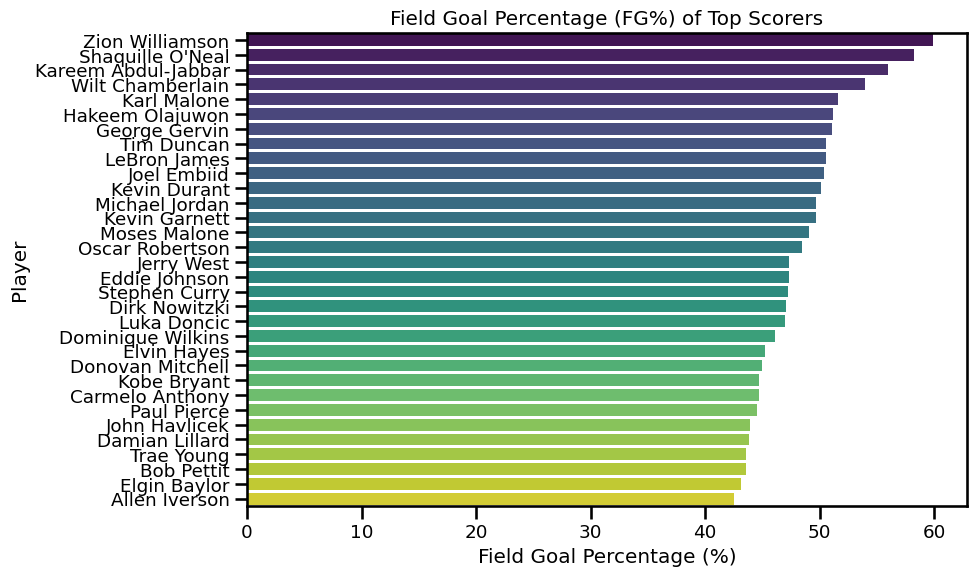

In [88]:
#visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='FG%', y='Player', data=fg_percent_df, palette='viridis')
plt.title('Field Goal Percentage (FG%) of Top Scorers')
plt.xlabel('Field Goal Percentage (%)')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


The above bar chart shows pretty insightful results. My observations are as follows:

<br>

1)These stats may not be indicative. Players like Zion Williamson who is only 23 years of age and has been injury prone for the most of his career cannot be considered the most efficient player of all time as he doesnt have a big sample size compared to the other players. We will check later on how much games these players have played and the correlation between their FGA and their FG%

<br>

2)It is very obvious from the above graph that players who are bigger are more likely to have a higher FG%, as they play closer to the basket.

<br>

3)We can see that players who play in the guard position, who usually take tougher shots(which we will show later on) have a lower FG%.

<br>

---Points---


Zion Williamson	    32 + 1 = 33


Shaquille O'Neal    31 + 11 = 42 	


Kareem Abdul-Jabbar 30 + 19 = 49	


Wilt Chamberlain 	29 + 33 = 62


Karl Malone	        28 + 24 = 52 


Hakeem Olajuwon	    27 + 7 = 34


George Gervin	    26 + 10 = 36


Tim Duncan	        25 + 4 = 29


LeBron James	    24 + 34 = 58


Joel Embiid	        23 + 17 = 40


Kevin Durant	    22 + 27 = 49 


Michael Jordan	    21 + 36 = 57


Kevin Garnett	    20 + 1 = 21


Moses Malone	    19 + 9 = 28


Oscar Robertson	    18 + 9 = 27


Jerry West	        17 + 13 = 30


Eddie Johnson	    16 + 13 = 29


Stephen Curry	    15 + 2 = 17


Dirk Nowitzki	    14 + 15 = 29


Luka Doncic	        13 + 18 = 31


Dominique Wilkins	12 + 8 = 20


Elvin Hayes	        11 + 8 = 19


Donovan Mitchell    10 + 4 = 14	 


Kobe Bryant	        9 + 22 = 31


Carmelo Anthony	    8 + 10 = 18


Paul Pierce	        7 + 3 = 10


John Havlicek	    6 + 2 = 8


Damian Lillard	    5 + 7 = 12   


Trae Young	        4 + 8 = 12


Bob Pettit	        3 + 11 = 14


Elgin Baylor	    2 + 16 = 18


Allen Iverson	    1 + 12 = 13

<br>

Let's dive even deeper into the reasons why we see what we see in the above bar graph:

In [140]:
#calculate the correlation between FGM and FGA
correlation = playerStats['field_goals_made'].corr(playerStats['field_goals_attempted'])

correlation

0.9887222255128926

As we can see the above correlation value suggest a very strong positive linear relationship between FGM and FGA. This means that these 2 stats are highly predictive of each other, knowing the value of one of these can allow us to make a strong prediction for the value of the other. For example, if a player takes more shots than others(attemps more field goals), we know that it can be one of 2 options from there on; 

1)he makes those extra shots, meaning his FG% will be higher, and in turn his PPG will skyrocket....or

2)he misses those extra shots and this results in his FG% being much lower than others

<br>

Now lets gain some insights into these players' scoring abilities:

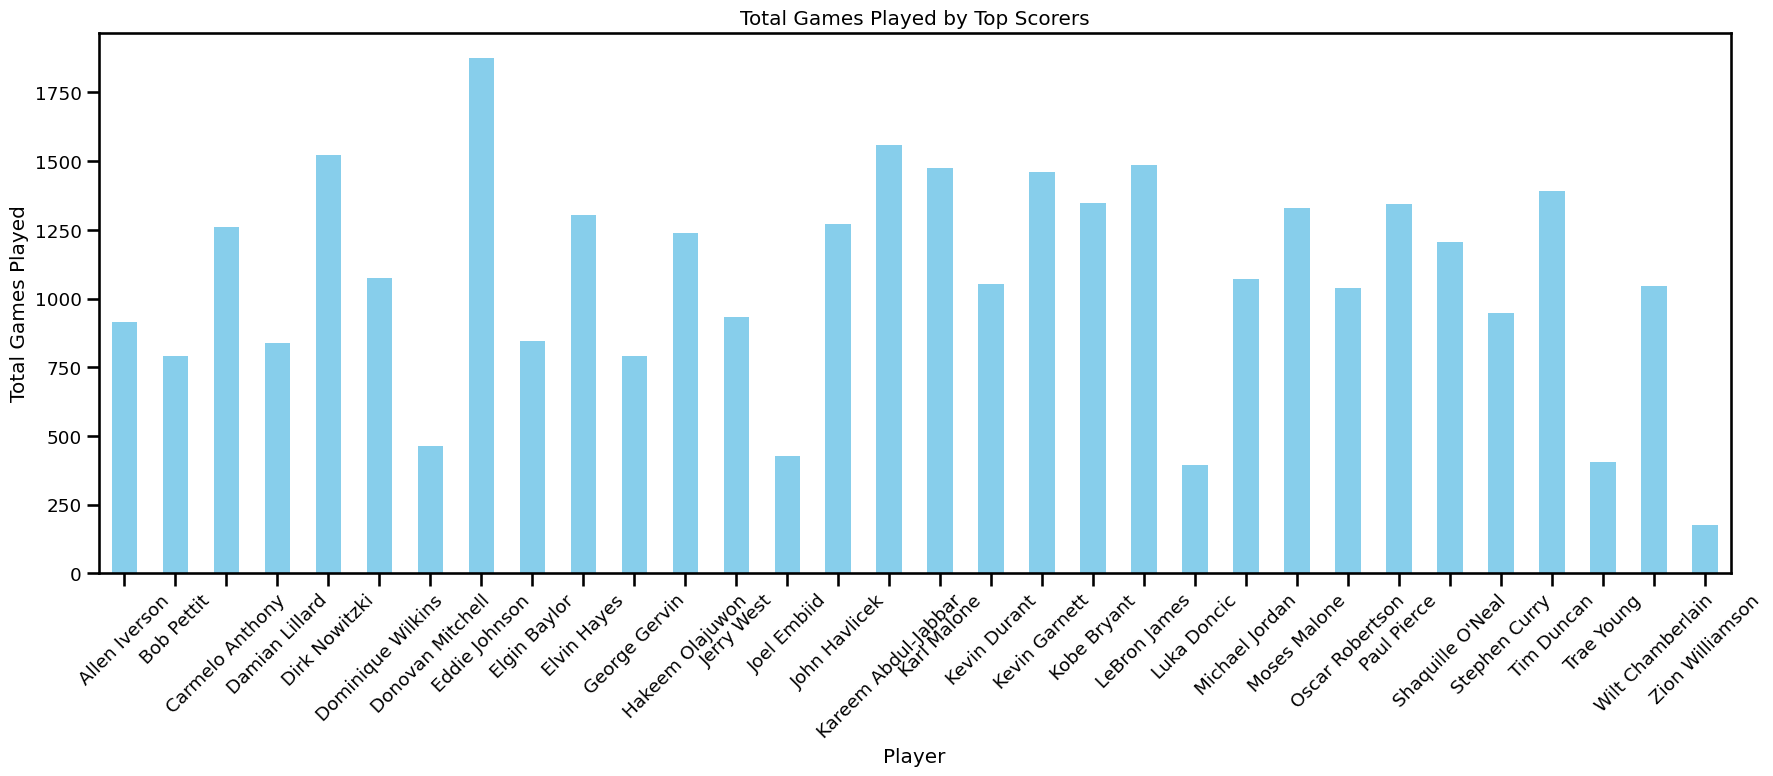

In [138]:

games_played_top_scorers = playerStats[playerStats['player_name'].isin(top_scorers)]['games_played'].groupby(playerStats['player_name']).sum()

games_played_top_scorers

#visualise
plt.figure(figsize=(18, 8))
games_played_top_scorers.plot(kind='bar', color='skyblue')
plt.title('Total Games Played by Top Scorers')
plt.xlabel('Player')
plt.ylabel('Total Games Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Some interesting points emerge from this graph; 

<br>

1)We can see that the younger players like Luka Doncic, Donovan Mitchell, and Trae Young, as well as Joel Embiid are scoring weapons and deserve a shout when being talked about amongst the best scorers of all time

<br>

2)Players like Eddie Johnson, Kareem Abdul-Jabbar, LeBron James, Michael Jordan have played alot of games throughout their career and so this means that their total points would be higher than alot of players considering their FG% and PPG is high too. However we must be careful with this as their efficiency may not be the best, let us examine these 4 players mminutes played against their PPG and their FG%, as well as their points scored against their minutes played:


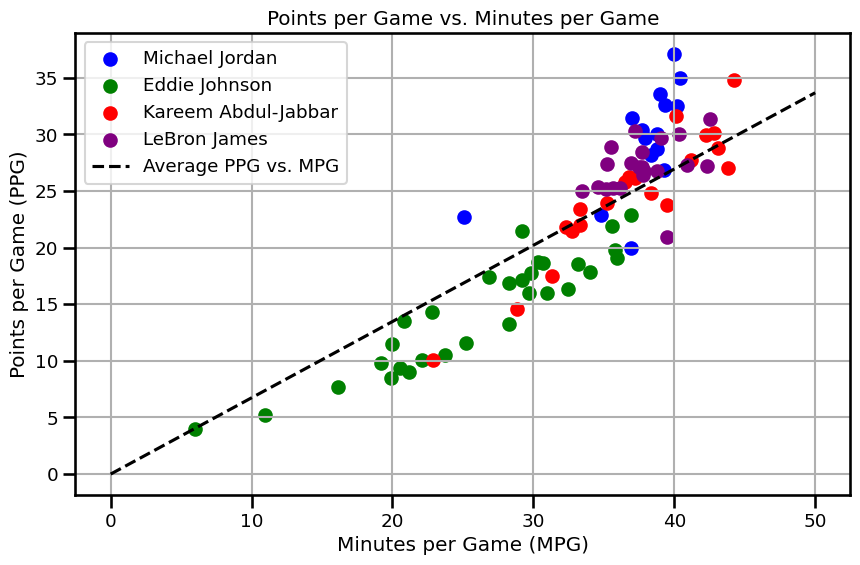

In [91]:
#filter data for Michael Jordan, Eddie Johnson, Kareem Abdul-Jabbar, and LeBron James
players = ['Michael Jordan', 'Eddie Johnson', 'Kareem Abdul-Jabbar', 'LeBron James']
player_data = playerStats[playerStats['player_name'].isin(players)].copy()  # Make a copy to avoid the warning

colors = {'Michael Jordan': 'blue', 'Eddie Johnson': 'green', 'Kareem Abdul-Jabbar': 'red', 'LeBron James': 'purple'}

#calculate PPG and minutes per game (MPG) for each player and season
player_data['PPG'] = player_data['points'] / player_data['games_played']
player_data['MPG'] = player_data['minutes_played'] / player_data['games_played']

#Plot PPG against MPG for each player
plt.figure(figsize=(10, 6))
for player in players:
    player_subset = player_data[player_data['player_name'] == player]
    plt.scatter(player_subset['MPG'], player_subset['PPG'], marker='o', color=colors[player], label=player)

plt.title("Points per Game vs. Minutes per Game")
plt.xlabel("Minutes per Game (MPG)")
plt.ylabel("Points per Game (PPG)")
plt.legend()
plt.grid(True)

average_PPG = player_data['PPG'].mean()
average_MPG = player_data['MPG'].mean()
plt.plot([0, 50], [0, 50 * average_PPG / average_MPG], color='black', linestyle='--', label='Average PPG vs. MPG')
plt.legend()
plt.show()

A point to note from this graph show that Eddie Johnson was a much worse scorer than the rest of the players as alot of his points, the green ones, are below the line, indicating that his PPG was lower than the other 3 players' PPG.

Let us now plot their total points scored against their minutes played:

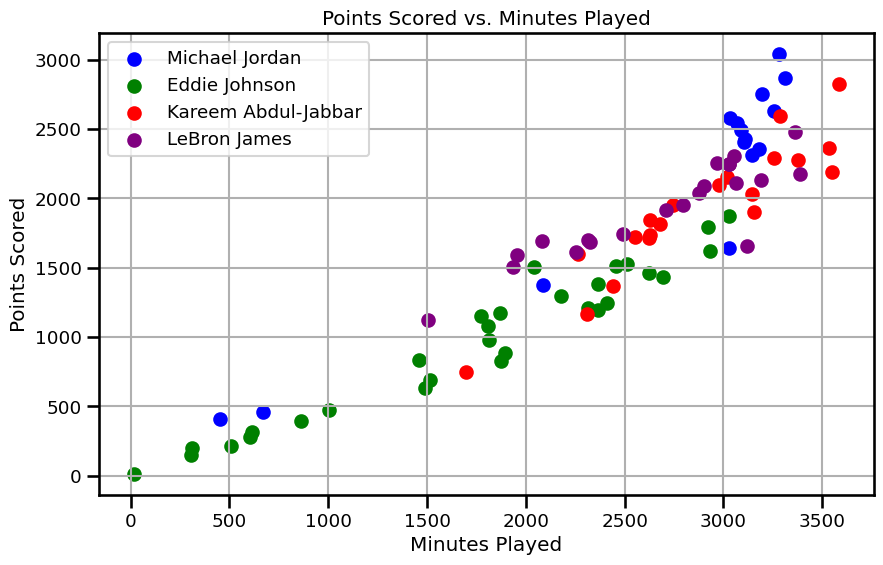

In [92]:
# Filter data for Michael Jordan, Eddie Johnson, Kareem Abdul-Jabbar, and LeBron James
players = ['Michael Jordan', 'Eddie Johnson', 'Kareem Abdul-Jabbar', 'LeBron James']
player_data = playerStats[playerStats['player_name'].isin(players)].copy()  # Make a copy to avoid the warning

colors = {'Michael Jordan': 'blue', 'Eddie Johnson': 'green', 'Kareem Abdul-Jabbar': 'red', 'LeBron James': 'purple'}

# Calculate PPG and MPG for each player and season
player_data['Points'] = player_data['points']
player_data['Minutes Played'] = player_data['minutes_played']

# Plot points scored against minutes played for each player 
plt.figure(figsize=(10, 6))
for player in players:
    player_subset = player_data[player_data['player_name'] == player]
    plt.scatter(player_subset['Minutes Played'], player_subset['Points'], marker='o', color=colors[player], label=player)

plt.title("Points Scored vs. Minutes Played")
plt.xlabel("Minutes Played")
plt.ylabel("Points Scored")
plt.legend()
plt.grid(True)

plt.show()

The clear trend for all players is that as they play more minutes, of course their points scored over a season will be increasing too. However we can see that for Michael Jordan there was a time where when he would play over 3000 minutes a season he would be averaging nearly 2500 points a season, which is really impressive and shows how consistent of a scorer he was.


Another thing we can plot now is how their points scored across their careers plotted against their minutes played can give us insights into how correlated the two are:

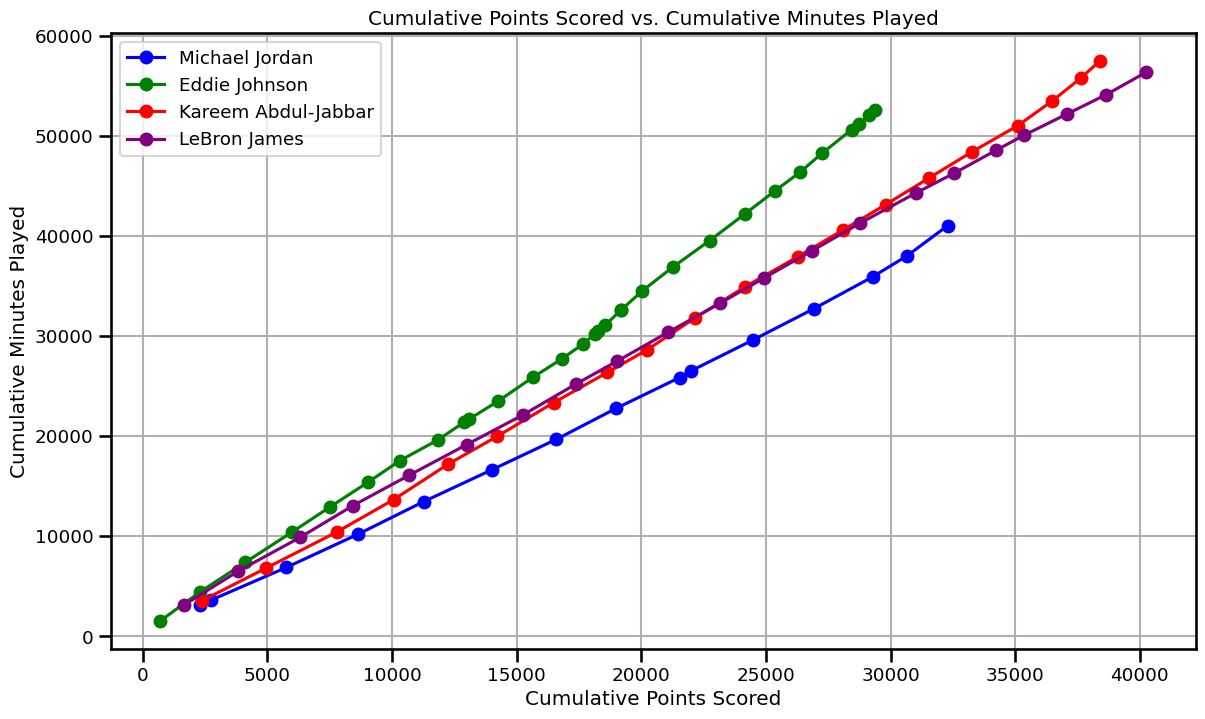

In [150]:

players = ['Michael Jordan', 'Eddie Johnson', 'Kareem Abdul-Jabbar', 'LeBron James']
player_data = playerStats[playerStats['player_name'].isin(players)].copy() 

colors = {'Michael Jordan': 'blue', 'Eddie Johnson': 'green', 'Kareem Abdul-Jabbar': 'red', 'LeBron James': 'purple'}

plt.figure(figsize=(14, 8))

# Calculate cumulative points and minutes played for each player
for player in players:
    player_subset = player_data[player_data['player_name'] == player].copy()  # Make a copy to avoid SettingWithCopyWarning
    player_subset.loc[:, 'Cumulative Points'] = player_subset['points'].cumsum()
    player_subset.loc[:, 'Cumulative Minutes Played'] = player_subset['minutes_played'].cumsum()

    plt.plot(player_subset['Cumulative Points'], player_subset['Cumulative Minutes Played'], marker='o', color=colors[player], label=player)

plt.title("Cumulative Points Scored vs. Cumulative Minutes Played")
plt.xlabel("Cumulative Points Scored")
plt.ylabel("Cumulative Minutes Played")
plt.legend()
plt.grid(True)
plt.show()

1st graph: As expected, their PPG is heavily correlated to their minutes played per game. As a players MPG increases, we can logically expect their PPG to increase as well, as they are given more time to score points. 

<br>

2nd and 3rd graph: However, going back to our original point of them having more points over time as they play more minutes; we can see that players who have played for more mintes will naturally have more points in their career. 

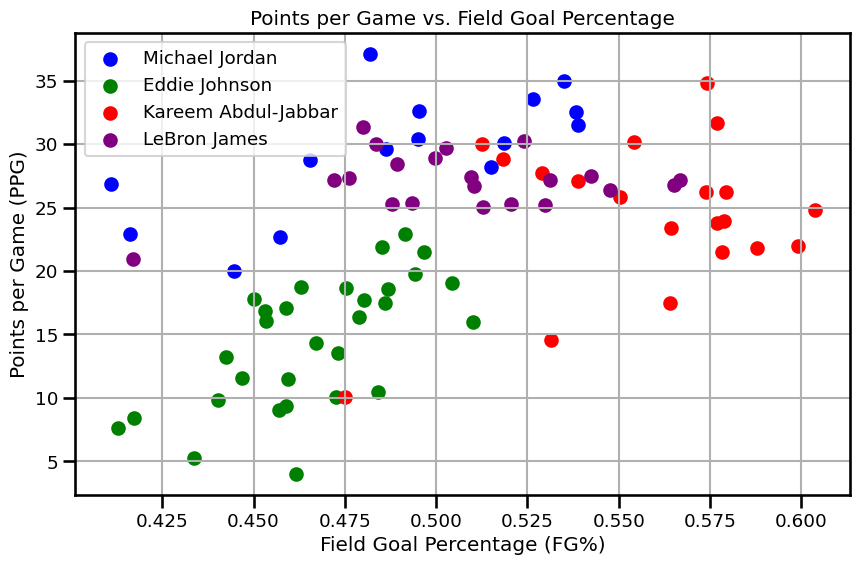

In [94]:
players = ['Michael Jordan', 'Eddie Johnson', 'Kareem Abdul-Jabbar', 'LeBron James']
colors = {'Michael Jordan': 'blue', 'Eddie Johnson': 'green', 'Kareem Abdul-Jabbar': 'red', 'LeBron James': 'purple'}

# Create a scatter plot for each player
plt.figure(figsize=(10, 6))
for player in players:
    player_data = playerStats[playerStats['player_name'] == player].copy()  # Make a copy to avoid the warning
    
    # Calculate PPG and FG% for each season
    player_data.loc[:, 'PPG'] = player_data['points'] / player_data['games_played']
    player_data.loc[:, 'FG%'] = player_data['field_goals_made'] / player_data['field_goals_attempted']
    
    # Plot PPG against FG% for the current player
    plt.scatter(player_data['FG%'], player_data['PPG'], marker='o', color=colors[player], label=player)

# Add labels and title
plt.title("Points per Game vs. Field Goal Percentage")
plt.xlabel("Field Goal Percentage (FG%)")
plt.ylabel("Points per Game (PPG)")
plt.legend()
plt.grid(True)
plt.show() 

From the above graph we can see one common theme, as a player starts to score more PPG, their FG% decreases. This is an expected result for me as a player takes more shots their FG% goes down due to


1)tiredness/exhaustion during game

 
2)the risk of missing shots increases if you take more shots. We can further prove point 2 by plotting a players Field Goals Attempted(FGA) against their FG%:

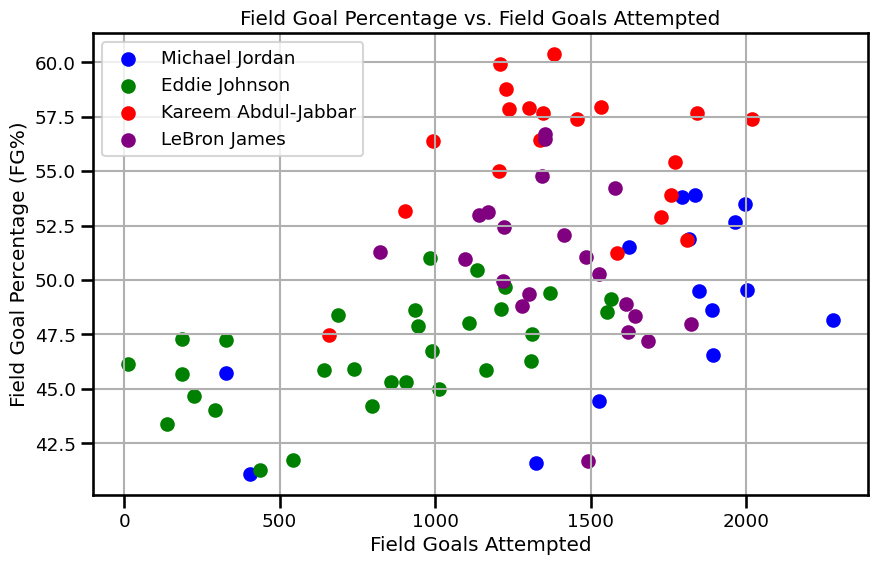

In [95]:
players = ['Michael Jordan', 'Eddie Johnson', 'Kareem Abdul-Jabbar', 'LeBron James']
colors = {'Michael Jordan': 'blue', 'Eddie Johnson': 'green', 'Kareem Abdul-Jabbar': 'red', 'LeBron James': 'purple'}

plt.figure(figsize=(10, 6))
for player in players:
    # Filter data for the current player
    player_data = playerStats[playerStats['player_name'] == player].copy()  # Make a copy to avoid the warning
    
    # Calculate FG% and FGA for each season
    player_data.loc[:, 'FG%'] = player_data['field_goals_made'] / player_data['field_goals_attempted'] * 100
    
    #Plot FG% against FGA for the current player
    plt.scatter(player_data['field_goals_attempted'], player_data['FG%'], marker='o', color=colors[player], label=player)

# Add labels and title
plt.title("Field Goal Percentage vs. Field Goals Attempted")
plt.xlabel("Field Goals Attempted")
plt.ylabel("Field Goal Percentage (FG%)")
plt.legend()
plt.grid(True)
plt.show()

These results would be the same for any other group of players.

<br>

Now, i'm sure we have all had enough of seeing FG% on the screen. Let's now look at another very important stat in scoring, which is...... **drum roll**

Three Point Percentage :)

<br>

And what better player to analyse when it comes to Three Point Percentage(3P%) other than the greatest shooter of all time(not a subjective opinion), Stephen Curry.

In [96]:
steph_curry_stats = playerStats[playerStats['player_name'] == 'Stephen Curry']
steph_curry_3pt_stats = steph_curry_stats[['season', 'three_pointers_made', 'three_pointers_attempted', 'three_point_pct']]
steph_curry_3pt_stats

,season,three_pointers_made,three_pointers_attempted,three_point_pct
23549,2009-10,166.0,380.0,0.437
23550,2010-11,151.0,342.0,0.442
23551,2011-12,55.0,121.0,0.455
23552,2012-13,272.0,600.0,0.453
23553,2013-14,261.0,615.0,0.424
23554,2014-15,286.0,646.0,0.443
23555,2015-16,402.0,886.0,0.454
23556,2016-17,324.0,789.0,0.411
23557,2017-18,212.0,501.0,0.423
23558,2018-19,354.0,810.0,0.437


Just to show you how extraordinary these three point stats are, lets see the average 3PT% stats:

In [97]:
average_3pt_stats = playerStats[["three_pointers_made", "three_pointers_attempted", "three_point_pct"]].mean()
print(average_3pt_stats)

#how much % more steph curry attempts 3pt shots than the average player
three_point_attempts = steph_curry_3pt_stats['three_pointers_attempted'].mean()
average_three_point_attempts = average_3pt_stats['three_pointers_attempted']
percentage_more_attempts = ((three_point_attempts - average_three_point_attempts) / average_three_point_attempts) * 100
print(f"Stephen Curry attempts {percentage_more_attempts:.2f}% more 3-point shots than the average player.")

#how much more accurate steph curry is at 3pt shots than the average player
three_point_percentage = steph_curry_3pt_stats['three_point_pct'].mean()
average_three_point_percentage = average_3pt_stats['three_point_pct']
percentage_more_accuracy = ((three_point_percentage - average_three_point_percentage) / average_three_point_percentage) * 100
print(f"Stephen Curry is {percentage_more_accuracy:.2f}% more accurate at 3-point shots than the average player.")




three_pointers_made         26.861274
three_pointers_attempted    76.044505
three_point_pct              0.222553
dtype: float64
Stephen Curry attempts 665.34% more 3-point shots than the average player.
Stephen Curry is 87.34% more accurate at 3-point shots than the average player.


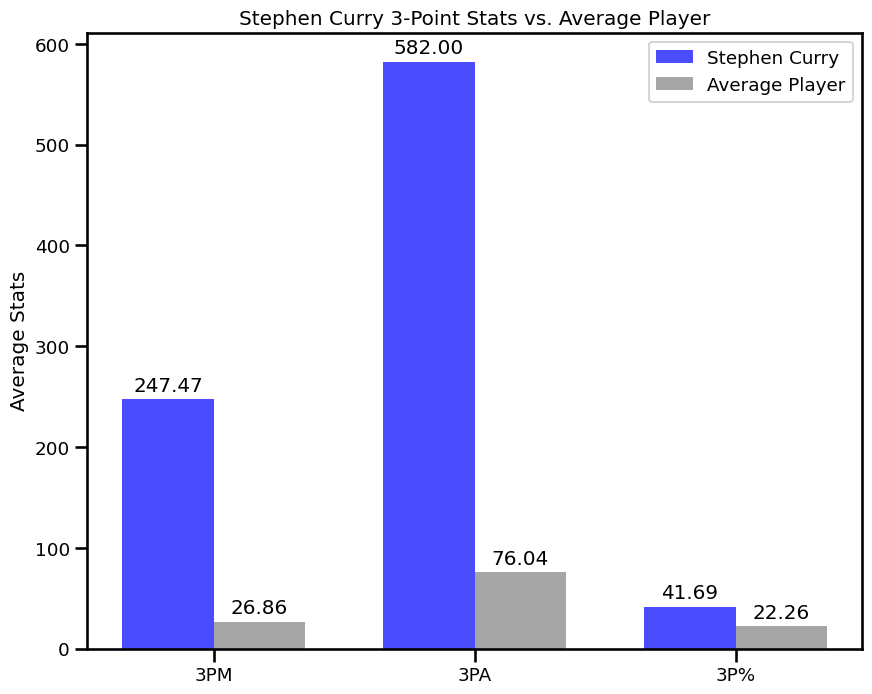

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the means
steph_curry_3pt_made = steph_curry_3pt_stats['three_pointers_made'].mean()
steph_curry_3pt_attempted = steph_curry_3pt_stats['three_pointers_attempted'].mean()
steph_curry_3pt_pct = steph_curry_3pt_stats['three_point_pct'].mean()

average_3pt_made = average_3pt_stats['three_pointers_made'].mean()
average_3pt_attempted = average_3pt_stats['three_pointers_attempted'].mean()
average_3pt_pct = average_3pt_stats['three_point_pct'].mean()

steph_curry_3pt_pct *= 100
average_3pt_pct *= 100

# Plot Steph Curry's average 3-point stats vs the average player's 3-point stats
labels = ['3PM', '3PA', '3P%']
steph_curry_stats = [steph_curry_3pt_made, steph_curry_3pt_attempted, steph_curry_3pt_pct]
average_stats = [average_3pt_made, average_3pt_attempted, average_3pt_pct]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))  
rects1 = ax.bar(x - width/2, steph_curry_stats, width, label='Stephen Curry', color='blue', alpha=0.7)
rects2 = ax.bar(x + width/2, average_stats, width, label='Average Player', color='gray', alpha=0.7)

#text for labels, title and custom x-axis tick labels
ax.set_ylabel('Average Stats')
ax.set_title('Stephen Curry 3-Point Stats vs. Average Player')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#add % on top of bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

We see that Steph Curry is an extraordinary 3 point shooter. However the gap may seem wider because we are comparing him to an average player from all of NBA history. Let us compare Steph's 3 point shooting stats to players after 2000, as it will give us a better indication of how he compares to modern players:

In [99]:
# Convert 'season' column to integers representing the starting year of each season
playerStats['starting_year'] = playerStats['season'].str.split('-').str[0].astype(int)


# Filter for players after the 2000 season
playerStats_after_2000 = playerStats[playerStats['starting_year'] >= 2005]

#Calculate the average stats after 2000
average_3pt_stats_after_2000 = playerStats_after_2000[["three_pointers_made", "three_pointers_attempted", "three_point_pct"]].mean()
print("Average 3-point shooting stats for all players after the 2000 season:")
print(average_3pt_stats_after_2000)

# Calculate how much % more Stephen Curry attempts 3pt shots than the average player after 2000
three_point_attempts_after_2000 = steph_curry_3pt_stats['three_pointers_attempted'].mean()
average_three_point_attempts_after_2000 = average_3pt_stats_after_2000['three_pointers_attempted']
percentage_more_attempts_after_2000 = ((three_point_attempts_after_2000 - average_three_point_attempts_after_2000) / average_three_point_attempts_after_2000) * 100
print(f"Stephen Curry attempts {percentage_more_attempts_after_2000:.2f}% more 3-point shots than the average player after the 2000 season.")

# Calculate how much more accurate Stephen Curry is at 3pt shots than the average player after 2000
three_point_percentage_after_2000 = steph_curry_3pt_stats['three_point_pct'].mean()
average_three_point_percentage_after_2000 = average_3pt_stats_after_2000['three_point_pct']
percentage_more_accuracy_after_2000 = ((three_point_percentage_after_2000 - average_three_point_percentage_after_2000) / average_three_point_percentage_after_2000) * 100
print(f"Stephen Curry is {percentage_more_accuracy_after_2000:.2f}% more accurate at 3-point shots than the average player after the 2000 season.")







Average 3-point shooting stats for all players after the 2000 season:
three_pointers_made          37.581879
three_pointers_attempted    104.810115
three_point_pct               0.259799
dtype: float64
Stephen Curry attempts 455.29% more 3-point shots than the average player after the 2000 season.
Stephen Curry is 60.48% more accurate at 3-point shots than the average player after the 2000 season.


Let us visualise these stats:

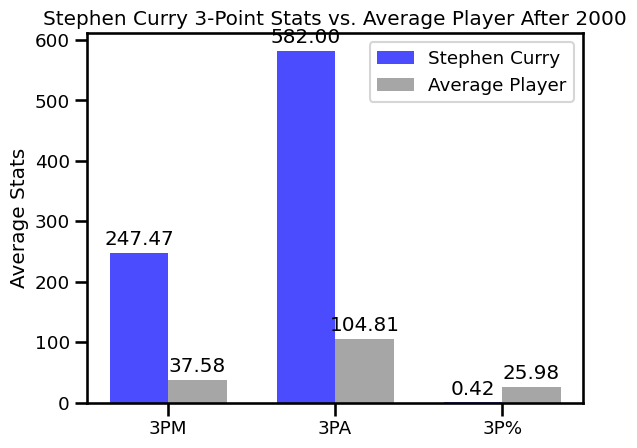

In [100]:
steph_curry_3pt_made = steph_curry_3pt_stats['three_pointers_made'].mean()
steph_curry_3pt_attempted = steph_curry_3pt_stats['three_pointers_attempted'].mean()
steph_curry_3pt_pct = steph_curry_3pt_stats['three_point_pct'].mean()

average_3pt_made_after_2000 = average_3pt_stats_after_2000['three_pointers_made']
average_3pt_attempted_after_2000 = average_3pt_stats_after_2000['three_pointers_attempted']
average_3pt_pct_after_2000 = average_3pt_stats_after_2000['three_point_pct']

average_3pt_pct_after_2000 *= 100

# Plot Steph Curry's average 3-point stats vs the average player's 3-point stats after 2000
labels = ['3PM', '3PA', '3P%']
steph_curry_stats = [steph_curry_3pt_made, steph_curry_3pt_attempted, steph_curry_3pt_pct]
average_stats = [average_3pt_made_after_2000, average_3pt_attempted_after_2000, average_3pt_pct_after_2000]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, steph_curry_stats, width, label='Stephen Curry', color='blue', alpha=0.7)
rects2 = ax.bar(x + width/2, average_stats, width, label='Average Player', color='gray', alpha=0.7)

#text for labels, title and custom x-axis tick labels
ax.set_ylabel('Average Stats')
ax.set_title('Stephen Curry 3-Point Stats vs. Average Player After 2000')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#%s on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate('%.2f' % height,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom')
    
for rect in rects2:
    height = rect.get_height()
    ax.annotate('%.2f' % height,
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    
plt.show()

It's clear that when looking at 3 point shooting, whether it is all time, or it's very recently, that Steph Curry is the anomaly. But let us see which other players come close to Steph:

In [101]:
#get the top 20 players with the most 3pt shots made
top_20_3pt_shooters = playerStats.groupby('player_name')['three_pointers_made'].sum().nlargest(20)
top_20_3pt_shooters = pd.DataFrame(top_20_3pt_shooters)

#get their 3pt% and add it to the dataframe
top_20_3pt_shooters['three_point_pct'] = playerStats.groupby('player_name')['three_point_pct'].mean()

#get their 3pt attempts and add it to the dataframe
top_20_3pt_shooters['three_pointers_attempted'] = playerStats.groupby('player_name')['three_pointers_attempted'].sum()

average_3pt_stats = average_3pt_stats[['three_point_pct', 'three_pointers_attempted', 'three_pointers_made']]

top_20_3pt_shooters




,three_pointers_made,three_point_pct,three_pointers_attempted
player_name,,,
Stephen Curry,3712.0,0.416933,8730.0
Ray Allen,2973.0,0.398000,7429.0
James Harden,2930.0,0.362706,8044.0
Damian Lillard,2597.0,0.368750,6996.0
Reggie Miller,2560.0,0.391167,6486.0
Kyle Korver,2450.0,0.428600,5715.0
Klay Thompson,2448.0,0.412000,5930.0
LeBron James,2395.0,0.347143,6897.0
Vince Carter,2290.0,0.362583,6168.0


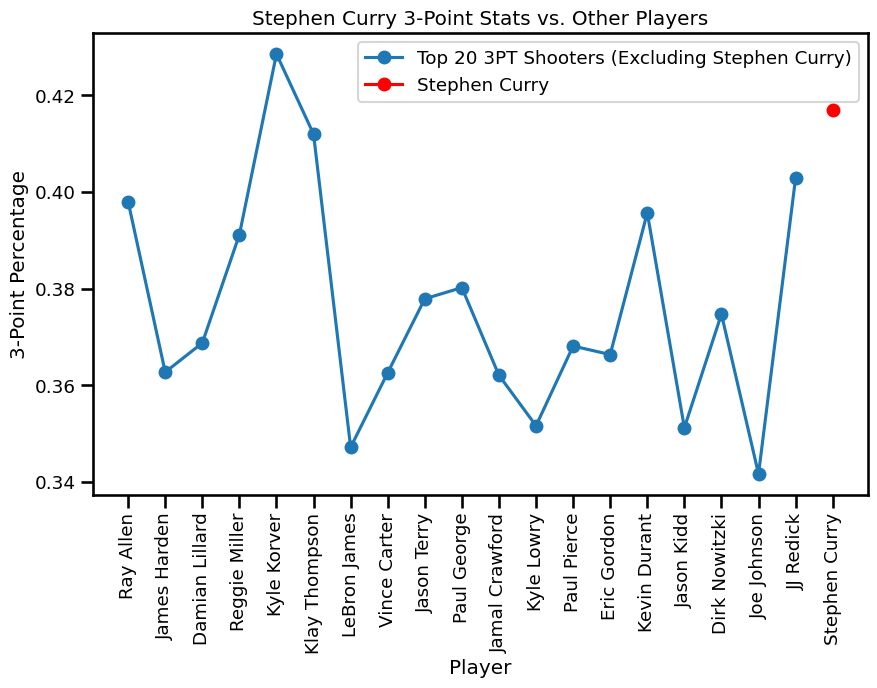

In [102]:
# Filter the top_20_3pt_shooters dataframe to exclude Stephen Curry
other_players = top_20_3pt_shooters[top_20_3pt_shooters.index != 'Stephen Curry']

#get the 3-point stats for Stephen Curry
curry_3pt_stats = top_20_3pt_shooters.loc[['Stephen Curry']]

#plot Steph's 3-point stats against the other players
plt.figure(figsize=(10, 6))
plt.plot(other_players.index, other_players['three_point_pct'], marker='o', linestyle='-', label='Top 20 3PT Shooters (Excluding Stephen Curry)')
plt.plot(curry_3pt_stats.index, curry_3pt_stats['three_point_pct'], marker='o', linestyle='-', color='red', label='Stephen Curry')
plt.xlabel('Player')
plt.ylabel('3-Point Percentage')
plt.title('Stephen Curry 3-Point Stats vs. Other Players')
plt.xticks(rotation=90)
plt.legend()
plt.show()


here we see that Kyle Korver actually has a higher 3PT% than Steph..... does this mean I'm a fraud and me claiming that Steph is the G.O.A.T shooter is a lie? 

<br>

Lets dive deeper into a comparison between the two to find out:

Stephen Curry has played 15 seasons, while Kyle Korver has played 17 seasons.
We will just compare their 15 seasons to get an insight


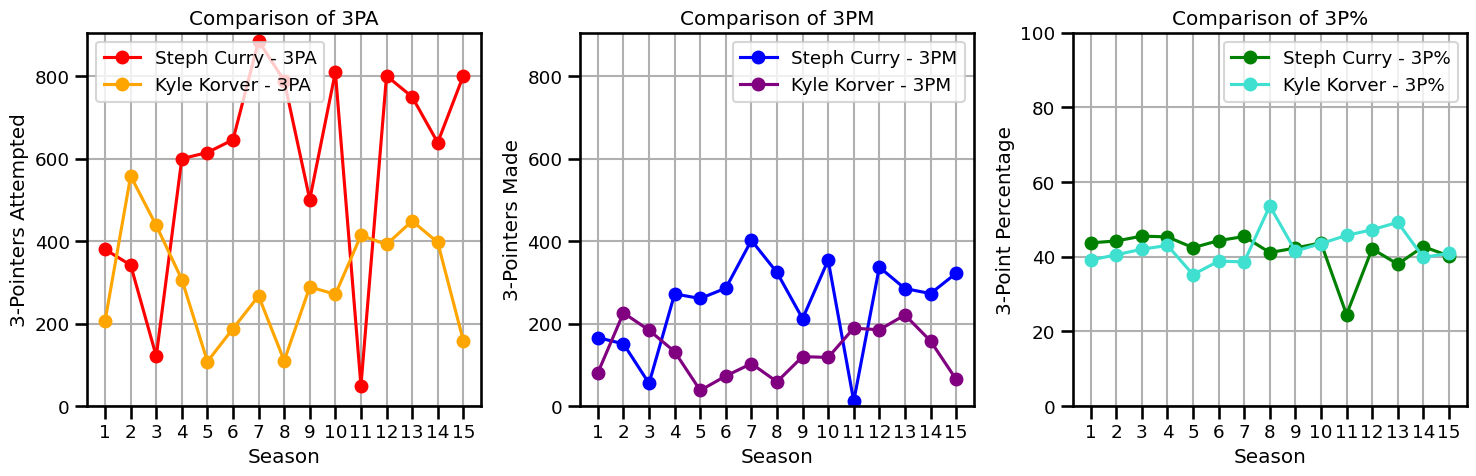

In [103]:

#get 3-point stats for Steph Curry and Kyle Korver
steph_curry_3pt_stats = playerStats[playerStats['player_name'] == 'Stephen Curry']
kyle_korver_3pt_stats = playerStats[playerStats['player_name'] == 'Kyle Korver']

#number of seasons played by each player
steph_curry_seasons = steph_curry_3pt_stats['season'].nunique()
kyle_korver_seasons = kyle_korver_3pt_stats['season'].nunique()

print(f"Stephen Curry has played {steph_curry_seasons} seasons, while Kyle Korver has played {kyle_korver_seasons} seasons.\nWe will just compare their 15 seasons to get an insight")

num_seasons = min(steph_curry_seasons, kyle_korver_seasons)

#3-point stats for each player
steph_curry_stats = steph_curry_3pt_stats[['three_pointers_made', 'three_pointers_attempted', 'three_point_pct']].iloc[:num_seasons]
kyle_korver_stats = kyle_korver_3pt_stats[['three_pointers_made', 'three_pointers_attempted', 'three_point_pct']].iloc[:num_seasons]

#x-axis labels
season_labels = np.arange(1, num_seasons + 1)

y_max = max(steph_curry_stats['three_pointers_made'].max(), kyle_korver_stats['three_pointers_made'].max(), 
            steph_curry_stats['three_pointers_attempted'].max(), kyle_korver_stats['three_pointers_attempted'].max())

# Plot 3PA
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(season_labels, steph_curry_stats['three_pointers_attempted'], marker='o', linestyle='-', color='red', label='Steph Curry - 3PA')
plt.plot(season_labels, kyle_korver_stats['three_pointers_attempted'], marker='o', linestyle='-', color='orange', label='Kyle Korver - 3PA')
plt.xlabel('Season')
plt.ylabel('3-Pointers Attempted')
plt.title('Comparison of 3PA')
plt.xticks(season_labels)
plt.ylim(0, y_max + 20) 
plt.grid(True)
plt.legend()

# Plot 3PM
plt.subplot(1, 3, 2)
plt.plot(season_labels, steph_curry_stats['three_pointers_made'], marker='o', linestyle='-', color='blue', label='Steph Curry - 3PM')
plt.plot(season_labels, kyle_korver_stats['three_pointers_made'], marker='o', linestyle='-', color='purple', label='Kyle Korver - 3PM')
plt.xlabel('Season')
plt.ylabel('3-Pointers Made')
plt.title('Comparison of 3PM')
plt.xticks(season_labels)
plt.ylim(0, y_max + 20)  
plt.grid(True)
plt.legend()

# Plot 3P%
plt.subplot(1, 3, 3)
plt.plot(season_labels, steph_curry_stats['three_point_pct']*100, marker='o', linestyle='-', color='green', label='Steph Curry - 3P%')
plt.plot(season_labels, kyle_korver_stats['three_point_pct']*100, marker='o', linestyle='-', color='turquoise', label='Kyle Korver - 3P%')
plt.xlabel('Season')
plt.ylabel('3-Point Percentage')
plt.title('Comparison of 3P%')
plt.xticks(season_labels)
plt.ylim(0, 100)  
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

As we can see, it is indeed safe to say that Steph retains his crown as the greatest shooter of all time due to the fact that he attempts way more 3 point shots than Kyle Korver, as seen in the second graph. He also makes more of his 3 point shots, as shown in the second graph. The third and final graph shows that overall their 3PT% is pretty neck and neck through most seasons, except their 8th seasons. In fact, Steph has a higher 3PT% in more seasons than Kyle, showing he is more consistent, and Kyle's 8th season pushes his averages up. 

<br>


However, there is a dramatic difference in their 11th seasons. Could it be injury? Let's investigate Steph's career to see what happened:

In [104]:
steph_curry_stats = playerStats[playerStats['player_name'] == 'Stephen Curry']
steph_curry_stats




,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,starting_year
23549,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2009-10,0,22.0,80,77.0,...,48.0,308.0,356.0,472,152.0,19.0,243.0,252,1399,2009
23550,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2010-11,0,23.0,74,74.0,...,52.0,234.0,286.0,432,109.0,20.0,226.0,233,1373,2010
23551,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2011-12,0,24.0,26,23.0,...,15.0,73.0,88.0,138,39.0,8.0,65.0,62,383,2011
23552,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2012-13,0,25.0,78,78.0,...,59.0,255.0,314.0,539,126.0,12.0,240.0,198,1786,2012
23553,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2013-14,0,26.0,78,78.0,...,46.0,288.0,334.0,666,128.0,14.0,294.0,194,1873,2013
23554,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2014-15,0,27.0,80,80.0,...,56.0,285.0,341.0,619,163.0,16.0,249.0,158,1900,2014
23555,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2015-16,0,28.0,79,79.0,...,68.0,362.0,430.0,527,169.0,15.0,262.0,161,2375,2015
23556,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2016-17,0,29.0,79,79.0,...,61.0,292.0,353.0,524,142.0,17.0,239.0,183,1999,2016
23557,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2017-18,0,30.0,51,51.0,...,36.0,225.0,261.0,310,80.0,8.0,153.0,114,1346,2017
23558,201939,Stephen Curry,1610612744,Golden State Warriors,GSW,2018-19,0,31.0,69,69.0,...,45.0,324.0,369.0,361,92.0,25.0,192.0,166,1881,2018


We can see from this that Steph's 11th season was the 2019/20 season, where our best buddy COVID-19 caused the season to be suspended indefinitely, and this explains the fall in Steph's 3PA and 3PM. Am I a fraud? I guess not(phew).

<br>

Let us now see which players are the best 3 point shooters from our list:


In [105]:
top_scorers_3pt = playerStats[playerStats['player_name'].isin(top_scorers)] 
top_scorers_3pt = top_scorers_3pt.groupby('player_name')['three_point_pct'].mean().sort_values(ascending=False)
top_scorers_3pt = pd.DataFrame(top_scorers_3pt)

top_scorers_3pt


,three_point_pct
player_name,
Stephen Curry,0.416933
Kevin Durant,0.395706
Dirk Nowitzki,0.374714
Damian Lillard,0.368750
Paul Pierce,0.368105
Donovan Mitchell,0.366286
Zion Williamson,0.362000
Trae Young,0.352667
LeBron James,0.347143


As we can see, these players have NaN values for their 3pt%s, what we'll do is award them the mean 3pt%, and then give them the same amt of points:

In [106]:
#fill their 3pt% with the mean 3pt% value 
top_scorers_3pt['three_point_pct'] = top_scorers_3pt['three_point_pct'].fillna(top_scorers_3pt['three_point_pct'].mean())
top_scorers_3pt = top_scorers_3pt.sort_values(by='three_point_pct', ascending=False)
top_scorers_3pt



,three_point_pct
player_name,
Stephen Curry,0.416933
Kevin Durant,0.395706
Dirk Nowitzki,0.374714
Damian Lillard,0.368750
Paul Pierce,0.368105
Donovan Mitchell,0.366286
Zion Williamson,0.362000
Trae Young,0.352667
LeBron James,0.347143


---Points---


Stephen Curry         32 + 17 = 49


Kevin Durant          31 + 49 = 80


Dirk Nowitzki	      30 + 29 = 59


Damian Lillard	      29 + 12 = 41


Paul Pierce	          28 + 10 = 38


Donovan Mitchell      27 + 14 = 41	


Zion Williamson	      26 + 33 = 59


Trae Young	          25 + 12 = 37


LeBron James	      24 + 58 = 82


Carmelo Anthony	      23 + 18 = 51


Allen Iverson	      22 + 13 = 35


Luka Doncic	          21 + 31 = 52


Joel Embiid	          20 + 40 = 60


Kobe Bryant	          19 + 31 = 50       


Eddie Johnson	      18 + 29 = 47


Michael Jordan	      17 + 57 = 74


Bob Pettit	          16 + 14 = 30


Oscar Robertson	      16 + 27 = 43


John Havlicek	      16 + 8 = 24


Jerry West	          16 + 30 = 46


Elgin Baylor	      16 + 18 = 34


Wilt Chamberlain	  16 + 62 = 78


Dominique Wilkins	  15 + 20 = 35


George Gervin	      14 + 36 = 50


Kevin Garnett	      13 + 21 = 34


Karl Malone	          12 + 52 = 64


Elvin Hayes	          11 + 19 = 30


Tim Duncan	          10 + 29 = 39


Hakeem Olajuwon	      9 + 34 = 43


Moses Malone	      8 + 28 = 36


Kareem Abdul-Jabbar	  7 + 49 = 56


Shaquille O'Neal	  6 + 42 = 48



The final aspect of a player's scoring that we have to analyse is their Free Throw Percentage(free_throw_pct). Let us see which players have the highest FT%:

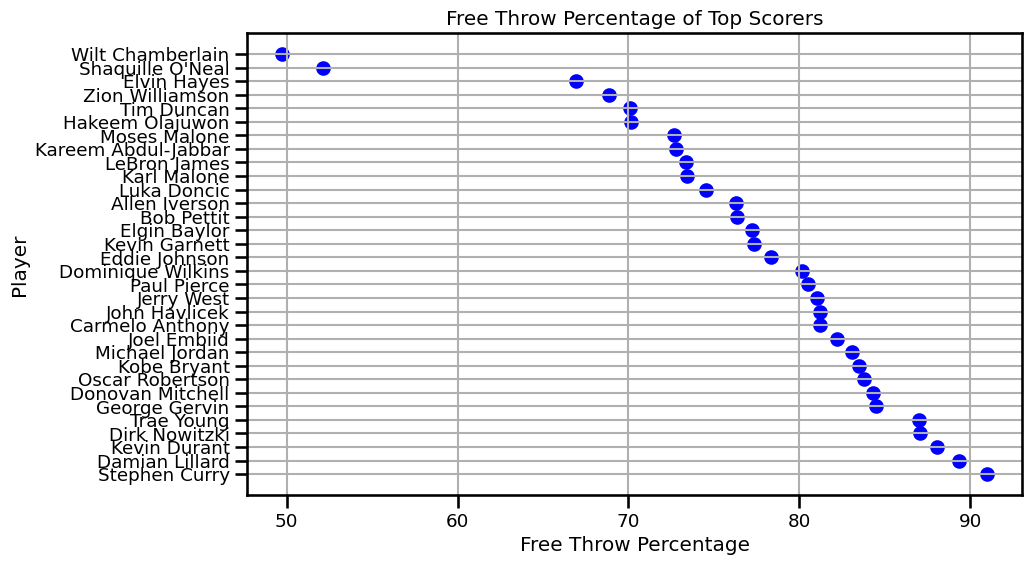

,free_throw_pct
player_name,
Stephen Curry,0.909800
Damian Lillard,0.893750
Kevin Durant,0.880471
Dirk Nowitzki,0.870714
Trae Young,0.870167
George Gervin,0.844900
Donovan Mitchell,0.843143
Oscar Robertson,0.837857
Kobe Bryant,0.834950


In [107]:
#FT% in descending order
free_throw_pct = playerStats.groupby('player_name')['free_throw_pct'].mean().sort_values(ascending=False)
free_throw_pct = free_throw_pct[free_throw_pct.index.isin(top_scorers)]
free_throw_pct = pd.DataFrame(free_throw_pct)

#visualise in scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(free_throw_pct['free_throw_pct'] * 100, free_throw_pct.index, color='blue')
plt.title('Free Throw Percentage of Top Scorers')
plt.xlabel('Free Throw Percentage')
plt.ylabel('Player')
plt.grid(True)
plt.show()

free_throw_pct


---Points---

Stephen Curry           32 + 49 = 81


Damian Lillard	        31 + 41 = 72


Kevin Durant	        30 + 80 = 110


Dirk Nowitzki	        29 + 59 = 88


Trae Young	            28 + 37 = 65


George Gervin	        27 + 50 = 27


Donovan Mitchell        26 + 41 = 67


Oscar Robertson	        25 + 43 = 68


Kobe Bryant	            24 + 50 = 74


Michael Jordan	        23 + 74 = 97


Joel Embiid	            22 + 60 = 82


Carmelo Anthony	        21 + 51 = 72


John Havlicek	        20 + 24 = 44


Jerry West	            19 + 46 = 65


Paul Pierce	            18 + 38 = 56


Dominique Wilkins	    17 + 35 = 52     


Eddie Johnson	        16 + 47 = 63


Kevin Garnett	        15 + 34 = 49


Elgin Baylor	        14 + 34 = 48 


Bob Pettit	            13 + 30 = 43


Allen Iverson	        12 + 35 = 47


Luka Doncic	            11 + 52 = 63


Karl Malone	            10 + 64 = 74


LeBron James	        9 + 82 = 91


Kareem Abdul-Jabbar	    8 + 56 = 64


Moses Malone	        7 + 36 = 43


Hakeem Olajuwon	        6 + 43 = 49


Tim Duncan	            5 + 39 = 44


Zion Williamson	        4 + 59 = 63


Elvin Hayes	            3 + 30 = 33


Shaquille O'Neal	    2 + 48 = 50


Wilt Chamberlain	    1 + 78 = 79

<br>

From our analysis and point allocation, the greatest scorer of all time is ***Kevin Durant***

**Playmaking**
<br>
Now, onto our next aspect in a players offensive game; playmaking. Going through the internet, I found many definitions of what a playmaker is, but here's the best points I found on how to explain what a playmaker is, for dummies:

<br>

1)someone who can create plays
<br>

2)someone who can initiate something to create a basket
<br>

3)someone who creates offensive advantages for themselves and their teammates
<br>

4)someone who can get their teammates involved
<br>

You're probably wondering; how do you even gauge the above? Fear not, take a backseat, enjoy your popcorn as I go through some very interesting analysis on who the best playmakers of all time are:


In [108]:
#top 20 players with most assists of all time 
top_20_players_assists = playerStats.groupby('player_name')['assists'].sum().nlargest(20)
top_20_players_assists = pd.DataFrame(top_20_players_assists)
top_20_players_assists


,assists
player_name,
John Stockton,15806
Jason Kidd,12091
Chris Paul,11842
LeBron James,10941
Steve Nash,10335
Mark Jackson,10334
Magic Johnson,10141
Oscar Robertson,9887
Russell Westbrook,9432


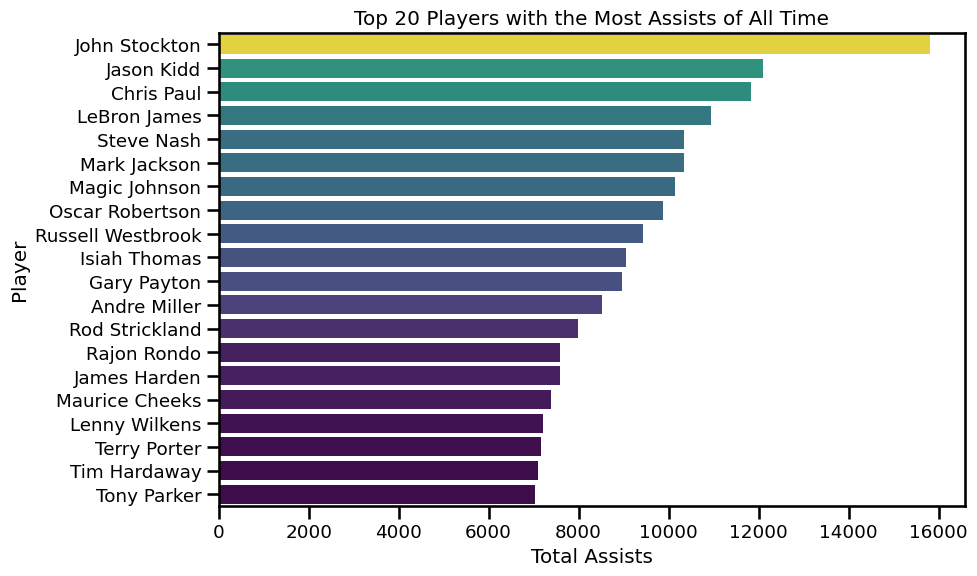

In [109]:
#bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='assists', y=top_20_players_assists.index, data=top_20_players_assists, hue='assists', palette='viridis', legend=False)
plt.title('Top 20 Players with the Most Assists of All Time')
plt.xlabel('Total Assists')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

---Points---

John Stockton       20 


Jason Kidd	        19


Chris Paul	        18


LeBron James	    17 


Steve Nash	        16


Mark Jackson	    15


Magic Johnson	    14


Oscar Robertson	    13


Russell Westbrook	12


Isiah Thomas	    11


Gary Payton	        10


Andre Miller	    9


Rod Strickland	    8


Rajon Rondo	        7


James Harden	    6


Maurice Cheeks	    5


Lenny Wilkens	    4


Terry Porter	    3


Tim Hardaway	    2


Tony Parker	        1

<br>


Let us now get the top 20 players with the highest Assists Per Game (APG) of all time:

In [110]:
#total points and total games played for each player
total_assists_by_player = playerStats.groupby('player_name')['assists'].sum()
total_games_by_player = playerStats.groupby('player_name')['games_played'].sum()

#calculate APG
apg_by_player = total_assists_by_player / total_games_by_player

#sort based on APG
sorted_players_apg = apg_by_player.sort_values(ascending=False)

#top 20 players with highest APG
top_20_playersAPG = sorted_players_apg.head(20)

top_20_playersAPG = top_20_playersAPG.reset_index()
top_20_playersAPG.columns = ['Player', 'APG']
top_20_playersAPG

,Player,APG
0,Magic Johnson,11.193157
1,John Stockton,10.509309
2,Oscar Robertson,9.506731
3,Trae Young,9.500000
4,Chris Paul,9.376089
5,Isiah Thomas,9.255363
6,Kevin Johnson,9.130612
7,John Wall,8.863988
8,Tyrese Haliburton,8.711462
9,Jason Kidd,8.692308


C:\Users\muham\AppData\Local\Temp\ipykernel_6416\2080735834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='APG', y='Player', data=top_20_playersAPG, palette='viridis')


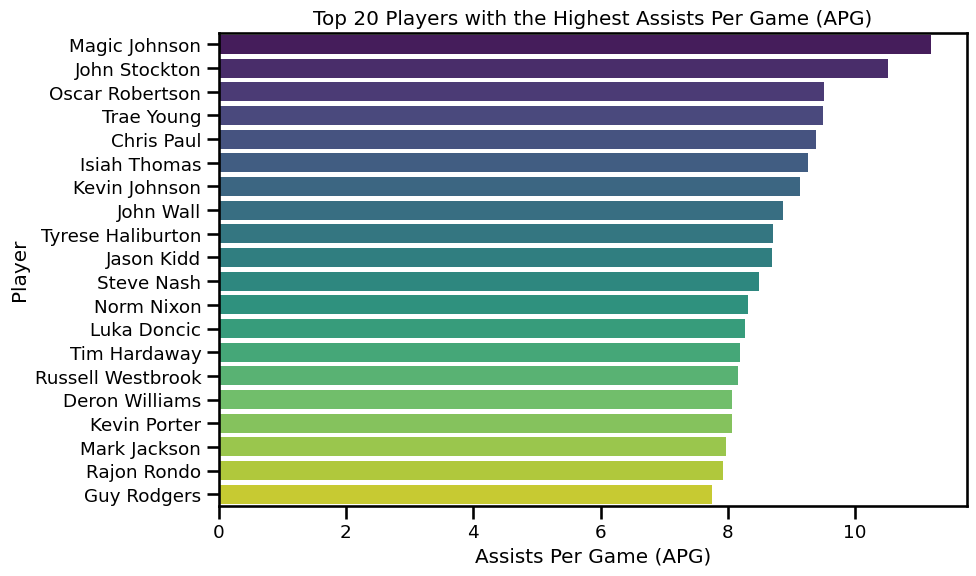

In [111]:
#visualise the APG of top 20 players in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='APG', y='Player', data=top_20_playersAPG, palette='viridis')
plt.title('Top 20 Players with the Highest Assists Per Game (APG)')
plt.xlabel('Assists Per Game (APG)')
plt.ylabel('Player')
plt.tight_layout()
plt.show()  


---Points---


Magic Johnson       20 + 14 = 34


John Stockton	    19 + 20 = 39


Oscar Robertson	    18 + 13 = 31


Trae Young	        17 


Chris Paul	        16 + 18 = 34


Isiah Thomas	    15 + 11 = 26


Kevin Johnson	    14 


John Wall	        13 


Tyrese Haliburton	12


Jason Kidd	        11 + 19 = 30


Steve Nash	        10 + 16 = 26


Norm Nixon          9 


Luka Doncic	        8


Tim Hardaway	    7 + 2 = 9


Russell Westbrook   6 + 12 = 18


Deron Williams	    5 


Kevin Porter	    4


Mark Jackson	    3 + 15 = 18


Rajon Rondo	        2 + 7 = 19


Guy Rodgers	        1 

In [112]:
#get a list of the top 20 players with the most assists
top_20_players_assists = top_20_players_assists.index

#get a list of the top 20 players with the highest APG
top_20_players_APG = top_20_playersAPG['Player']

#Add all players to same list, except players that are in both lists to be added only once
top_assist_players = top_20_players_assists.union(top_20_players_APG)
print(top_assist_players)


Index(['Andre Miller', 'Chris Paul', 'Deron Williams', 'Gary Payton',
       'Guy Rodgers', 'Isiah Thomas', 'James Harden', 'Jason Kidd',
       'John Stockton', 'John Wall', 'Kevin Johnson', 'Kevin Porter',
       'LeBron James', 'Lenny Wilkens', 'Luka Doncic', 'Magic Johnson',
       'Mark Jackson', 'Maurice Cheeks', 'Norm Nixon', 'Oscar Robertson',
       'Rajon Rondo', 'Rod Strickland', 'Russell Westbrook', 'Steve Nash',
       'Terry Porter', 'Tim Hardaway', 'Tony Parker', 'Trae Young',
       'Tyrese Haliburton'],
      dtype='object', name='player_name')


I obtained the list for the players with the most assists of all time, and the players with the most APG of all time. I then made a list to add the players in both categories into one. The reasoning for this is to get the players who have the best assist stats of all time, this is a good indicator of who gets their teammates involved the most and is naturally the best playmakers.

<br>

It's important when factoring in the best playmaker, how good you are at handling the ball. You cannot be a good playmaker but turn the ball over too much, as this leads to your opponents having more possessions of the ball. More possessions mean more scoring opportunities. As the primary ball handler(playmaker), you need to turn the ball over as less as possible. Let us analyse which players from our list are the safest ball handlers:

In [113]:
#get turnovers per game for players in top assisters list
top_assist_players_stats = playerStats[playerStats['player_name'].isin(top_assist_players)]
turnovers_per_game = top_assist_players_stats.groupby('player_name')['turnovers'].sum() / top_assist_players_stats.groupby('player_name')['games_played'].sum()
top_assist_players_TO_per_game = pd.DataFrame(turnovers_per_game, columns=['turnovers_per_game'])
top_assist_players_TO_per_game = top_assist_players_TO_per_game.sort_values(by='turnovers_per_game', ascending=True)

top_assist_players_TO_per_game

,turnovers_per_game
player_name,
Guy Rodgers,0.000000
Oscar Robertson,0.000000
Lenny Wilkens,0.000000
Kevin Porter,1.719272
Maurice Cheeks,2.059946
Terry Porter,2.092622
Gary Payton,2.269663
Tyrese Haliburton,2.280632
Tony Parker,2.284689


Here we can see that a few players in our dataset have 0 turnovers, which isnt possible at all. What we'll do now is we won't allocate points to these players due to them not having these stats available. It would be unfair to have players in the top 20 list to not be competing for the title of best playmaker at least.

In [114]:
#print which players have 0 turnovers
players_with_zero_turnovers = top_assist_players_TO_per_game[top_assist_players_TO_per_game['turnovers_per_game'] == 0]
print(players_with_zero_turnovers)

                 turnovers_per_game
player_name                        
Guy Rodgers                     0.0
Oscar Robertson                 0.0
Lenny Wilkens                   0.0


---Points---


Kevin Porter        26 + 4 = 30


Maurice Cheeks	    25 + 5 = 30


Terry Porter	    24 + 3 = 27


Gary Payton	        23 + 10 = 33


Tyrese Haliburton   22 + 12 = 34


Tony Parker	        21 + 1 = 22


Chris Paul	        20 + 34 = 54


Andre Miller	    19 + 9 = 28


Mark Jackson	    18 + 18 = 36


Rod Strickland	    17 + 8 = 25


Rajon Rondo	        16 + 19 = 35


John Stockton	    15 + 39 = 54


Deron Williams	    14 + 5 = 19


Steve Nash	        13 + 26 = 39


Tim Hardaway	    12 + 9 = 21


Jason Kidd	        11 + 30 = 41


Kevin Johnson	    10 + 14 = 24


Norm Nixon	        9 + 9 = 18


LeBron James	    8 + 17 = 25


James Harden	    7 + 6 = 13


John Wall	        6 + 13 = 19


Isiah Thomas	    5 + 26 = 31


Magic Johnson	    4 + 34 = 38


Russell Westbrook	3 + 18 = 21


Luka Doncic	        2 + 8 = 10


Trae Young	        1 + 17 = 18

Another great stat is too see what players have the best Assist to Turnover(TO) ratio. To explain what this stat is, I must give a bit extra context that I perhaps should have done earlier:

<br>

1)An “assist” goes to the player who passes the ball to a teammate who then scores a basket


<br>


2)A “turnover” is when a player loses possession of the ball to the opposite team.


<br>

That being said; Assist to turnover ratio puts a player’s assists in context with their turnovers. A higher AST/TO can mean more ball control. A lower number can mean less ball control. Some consider it an indicator of ball control. A player who creates more assists (passes that make a point) and fewer turnovers (the number of times they lose the ball) may have better/safer ball control.




In [115]:
#get each player in top_assist_players list's total assists and turnovers
top_assist_players_stats = playerStats[playerStats['player_name'].isin(top_assist_players)].groupby('player_name')[['assists', 'turnovers']].sum()
top_assist_players_stats

#get AST/TO ratio for each player
top_assist_players_stats['assist_to_turnover_ratio'] = top_assist_players_stats['assists'] / top_assist_players_stats['turnovers']
top_assist_players_stats = top_assist_players_stats.sort_values(by='assist_to_turnover_ratio', ascending=False)

top_assist_players_stats


,assists,turnovers,assist_to_turnover_ratio
player_name,,,
Guy Rodgers,6917,0.0,inf
Lenny Wilkens,7211,0.0,inf
Oscar Robertson,9887,0.0,inf
Kevin Porter,5314,1133.0,4.690203
Chris Paul,11842,2948.0,4.016961
Tyrese Haliburton,2204,577.0,3.819757
John Stockton,15806,4244.0,3.724317
Mark Jackson,10334,3155.0,3.275436
Maurice Cheeks,7392,2268.0,3.259259


C:\Users\muham\AppData\Local\Temp\ipykernel_6416\469142080.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='assist_to_turnover_ratio', y=top_assist_players_stats_sorted.index, data=top_assist_players_stats_sorted, palette='viridis')


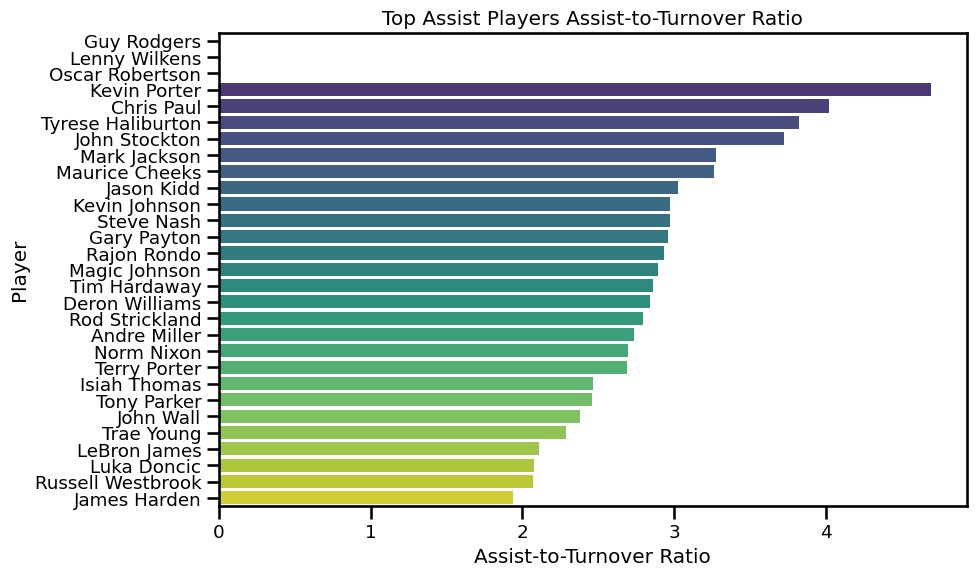

In [116]:
#visualise the assist-to-turnover ratio of the top assist players
top_assist_players_stats_sorted = top_assist_players_stats.sort_values(by='assist_to_turnover_ratio', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='assist_to_turnover_ratio', y=top_assist_players_stats_sorted.index, data=top_assist_players_stats_sorted, palette='viridis')
plt.title('Top Assist Players Assist-to-Turnover Ratio')
plt.xlabel('Assist-to-Turnover Ratio')
plt.ylabel('Player')
plt.tight_layout()
plt.show()



The above graph shows us who are the best/safest ball handlers. We can see here that Kevin Porter and Chris Paul and Tyrese Haliburton are the 3 safest ball handlers. Not a suprise considering they all play the Point-Guard position. 

---Points---

Kevin Porter        26 + 30 = 56


Chris Paul          25 + 54 = 79


Tyrese Haliburton   24 + 34 = 58


John Stockton       23 + 54 = 77


Mark Jackson        22 + 36 = 58


Maurice Cheeks	    21 + 30 = 51


Jason Kidd	        20 + 41 = 61


Kevin Johnson	    19 + 24 = 43


Steve Nash	        18 + 39 = 57


Gary Payton	        17 + 33 = 50


Rajon Rondo	        16 + 35 = 51   


Magic Johnson	    15 + 38 = 53


Tim Hardaway	    14 + 21 = 35


Deron Williams      13 + 19 = 32


Rod Strickland      12 + 25 = 37


Andre Miller        11 + 28 = 39 


Norm Nixon	        10 + 18 = 28


Terry Porter	    9 + 27 = 36


Isiah Thomas	    8 + 31 = 39


Tony Parker	        7 + 22 = 29


John Wall           6 + 19 = 25


Trae Young	        5 + 18 = 23


LeBron James        4 + 25 = 29


Luka Doncic	        3 + 10 = 13


Russell Westbrook   2 + 21 = 23


James Harden	    1 + 13 = 14

<br>


Let us now move on to players with the least turnovers per game:

In [117]:
#get the players in the top assisters lists turnovers per game
top_assist_players_TO_per_game = playerStats[playerStats['player_name'].isin(top_assist_players)]['turnovers'].groupby(playerStats['player_name']).sum()
top_assist_players_TO_per_game = top_assist_players_TO_per_game / total_games_by_player[top_assist_players_TO_per_game.index]

top_assist_players_TO_per_game = top_assist_players_TO_per_game.sort_values(ascending=True)
top_assist_players_TO_per_game = pd.DataFrame(top_assist_players_TO_per_game)
top_assist_players_TO_per_game.columns = ['turnovers_per_game']

top_assist_players_TO_per_game
                                                                                                                                                                    




,turnovers_per_game
player_name,
Guy Rodgers,0.000000
Oscar Robertson,0.000000
Lenny Wilkens,0.000000
Kevin Porter,1.719272
Maurice Cheeks,2.059946
Terry Porter,2.092622
Gary Payton,2.269663
Tyrese Haliburton,2.280632
Tony Parker,2.284689


What I can immediately observe here is that players who have higher turnovers per game are the players who are their teams main scorers as well, including Luka Doncic, Trae Young, Westbrook, Harden, etc. Let's see the players in this list's PPG and compare it to how it affects their turnovers:

In [118]:
#get the players in the top assisters lists PPG
top_assist_players_PPG = playerStats[playerStats['player_name'].isin(top_assist_players)]['points'].groupby(playerStats['player_name']).sum()
top_assist_players_PPG = top_assist_players_PPG / total_games_by_player[top_assist_players_PPG.index]

top_assist_players_TO_per_game['points per game'] = top_assist_players_PPG
top_assist_players_TO_per_game



,turnovers_per_game,points per game
player_name,,
Guy Rodgers,0.000000,11.676009
Oscar Robertson,0.000000,25.682692
Lenny Wilkens,0.000000,16.501393
Kevin Porter,1.719272,11.600910
Maurice Cheeks,2.059946,11.076294
Terry Porter,2.092622,12.233909
Gary Payton,2.269663,16.339326
Tyrese Haliburton,2.280632,17.197628
Tony Parker,2.284689,15.528708


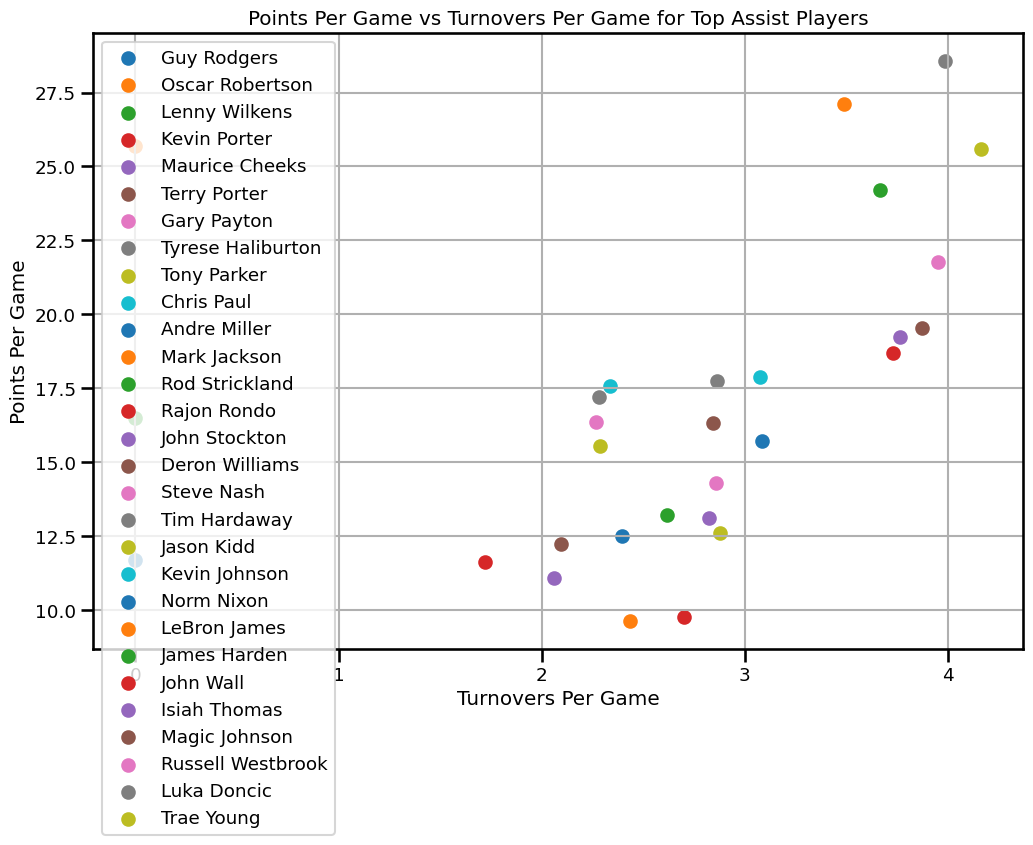

In [119]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each player's PPG and turnovers per game
for player, ppg, to_per_game in zip(top_assist_players_TO_per_game.index, top_assist_players_TO_per_game['points per game'], top_assist_players_TO_per_game['turnovers_per_game']):
    ax.scatter(to_per_game, ppg, label=player)
ax.set_xlabel('Turnovers Per Game')
ax.set_ylabel('Points Per Game')
ax.set_title('Points Per Game vs Turnovers Per Game for Top Assist Players')
ax.legend()
plt.grid(True)
plt.show()

As we can see here clearly, the players who have the burden of being the teams main scorer, also have higher turnovers per game as they're responsible for creating shots for themselves AND their teammates. The higher turnovers could be a result of fatigue of taking on more than one role on a team.

<br>

Another stat that may not be directly a playmaking stat, but could be very useful is defensive rebounds. A defensive rebound is when a player collects the ball after either his opponent has missed a shot or his own teammate has missed a shot. The way I relate this to playmaking is that a rebound on defense can be equivalent to a made shot on offense. Let us see which of the players have the most defensive rebounds:

In [120]:
#get def rebounds for each player in the top assist players list
top_assist_players_DRB = playerStats[playerStats['player_name'].isin(top_assist_players)]['defensive_rebounds'].groupby(playerStats['player_name']).sum()

top_assist_players_DRB = pd.DataFrame(top_assist_players_DRB)
top_assist_players_DRB


,defensive_rebounds
player_name,
Andre Miller,3422.0
Chris Paul,4893.0
Deron Williams,2266.0
Gary Payton,3877.0
Guy Rodgers,0.0
Isiah Thomas,2527.0
James Harden,5171.0
Jason Kidd,6957.0
John Stockton,3085.0


Examining the list above, it may not have been the best idea to get their total defensive rebounds as some of these players are under 25 and some have finished their careers, so lets get their defensive rebounds per game:

In [121]:
#defensive rebounds PG for each player
top_assist_players_DRBPG = (playerStats[playerStats['player_name'].isin(top_assist_players)].groupby('player_name')['defensive_rebounds'].sum() /playerStats[playerStats['player_name'].isin(top_assist_players)].groupby('player_name')['games_played'].sum())

top_assist_players_DRBPG = pd.DataFrame(top_assist_players_DRBPG)
top_assist_players_DRBPG.columns = ['DRBPG']

top_assist_players_DRBPG_sorted = top_assist_players_DRBPG.sort_values(by='DRBPG', ascending=False)
top_assist_players_DRBPG_sorted

,DRBPG
player_name,
Luka Doncic,7.677665
LeBron James,6.340741
Russell Westbrook,5.542857
Magic Johnson,5.472406
Jason Kidd,5.001438
James Harden,4.850844
Chris Paul,3.874109
John Wall,3.621329
Rajon Rondo,3.593521


Now that we have a really good indication of which players have the most defensive rebounds, we can see that Luka Doncic leads this stat amongst these players. 

<br>

---Points---

Luka Doncic         29 + 13 = 32


LeBron James	    28 + 29 = 57


Russell Westbrook   27 + 23 = 50


Magic Johnson	    26 + 53 = 79


Jason Kidd	        25 + 61 = 86


James Harden	    24 + 14 = 38


Chris Paul	        23 + 79 = 102


John Wall	        22 + 25 = 47


Rajon Rondo	        21 + 51 = 72


Tyrese Haliburton	20 + 58 = 78 


Trae Young	        19 + 23 = 42


Gary Payton	        18 + 50 = 68


Mark Jackson	    17 + 58 = 75


Deron Williams	    16 + 32 = 48


Tim Hardaway	    15 + 35 = 50


Rod Strickland	    14 + 37 = 51


Andre Miller	    13 + 39 = 52


Kevin Johnson	    12 + 43 = 55


Isiah Thomas	    11 + 39 = 50 


Terry Porter	    10 + 36 = 46


Steve Nash	        9 + 57 = 66


Tony Parker	        8 + 29 = 37


Maurice Cheeks	    7 + 51 = 58


John Stockton	    6 + 77 = 83


Norm Nixon	        5 + 28 = 33


Kevin Porter	    4 + 56 = 60


Lenny Wilkens	    3 
	       
<br>

From our analysis and point allocation, the greatest playmaker of all time is ***Chris Paul***


<br>

## Defensive Stats
**Rebounding**
<br>

To explain this, it is a stat awarded to a player who retrieves the ball after a missed field goal(shot attempt) or free throw.


**Perimeter Defence**
<br>

"Perimeter defense is a basketball defensive concept associated with systems, strategies, or tactics that are designed to limit or prevent offensive plans of actions, particularly near the perimeter areas of the court, which could lead to reduced offensive scoring production and/or turnovers."
<br>
This definition by hoopstudent.com of perimeter defence was so perfect i had to copy it word for word in this. And to explain what the perimeter is; its the areas outside the free throw line and inside the 3 point line. The optimal way to measure perimeter defence is through how many steals a player gets.


**Interior Defence**
<br>

"Interior defense in basketball refers to the defensive play and strategies employed by players to protect the area close to the basket, often referred to as the "paint" or "key." It involves preventing opponents from scoring close-range shots, primarily layups, dunks, and shots in the immediate vicinity of the basket."
<br>
This definition i got from (whisper it) chatgpt, and the best way to measure interior defence is by the number of blocks a player has


Let us start off with....

<br>

**Perimeter Defence**


In [122]:
#top 20 players with most steals
top_20_players_steals = playerStats.groupby('player_name')['steals'].sum().nlargest(20)
top_20_players_steals = pd.DataFrame(top_20_players_steals)
top_20_players_steals



,steals
player_name,
John Stockton,3265.0
Jason Kidd,2684.0
Chris Paul,2600.0
Michael Jordan,2514.0
Gary Payton,2445.0
Maurice Cheeks,2310.0
Scottie Pippen,2307.0
LeBron James,2262.0
Clyde Drexler,2207.0


In [123]:
#top 20 players with most Steals per game
total_steals_by_player = playerStats.groupby('player_name')['steals'].sum()
total_games_by_player = playerStats.groupby('player_name')['games_played'].sum()

spg_by_player = total_steals_by_player / total_games_by_player
sorted_players_spg = spg_by_player.sort_values(ascending=False)
top_20_playersSPG = sorted_players_spg.head(20)

top_20_playersSPG = top_20_playersSPG.reset_index()
top_20_playersSPG.columns = ['Player', 'SPG']
top_20_playersSPG

,Player,SPG
0,Alvin Robertson,2.711168
1,Micheal Ray Richardson,2.631295
2,Michael Jordan,2.345149
3,Mookie Blaylock,2.334083
4,Lafayette Lever,2.215426
5,Slick Watts,2.199085
6,John Stockton,2.170878
7,Allen Iverson,2.169584
8,Maurice Cheeks,2.098093
9,Chris Paul,2.058591


In [124]:
#top 20 players with the most steals
top_20_players_steals = top_20_players_steals.index

#top 20 players with the highest SPG
top_20_players_SPG = top_20_playersSPG['Player']

#Add all players to same list, except players that are in both lists to be added only once
top_steal_players = top_20_players_steals.union(top_20_players_SPG)
print(top_steal_players)




Index(['Allen Iverson', 'Alvin Robertson', 'Andre Iguodala', 'Chris Paul',
       'Clyde Drexler', 'Derek Harper', 'Gary Payton', 'Gus Williams',
       'Hakeem Olajuwon', 'Isiah Thomas', 'Jason Kidd', 'John Stockton',
       'Johnny Moore', 'Karl Malone', 'Kevin Garnett', 'Kobe Bryant',
       'Lafayette Lever', 'LeBron James', 'Magic Johnson', 'Maurice Cheeks',
       'Michael Jordan', 'Micheal Ray Richardson', 'Mookie Blaylock',
       'Nate McMillan', 'Ralph Jackson', 'Renaldo Major', 'Ron Lee',
       'Russell Westbrook', 'Scottie Pippen', 'Slick Watts'],
      dtype='object', name='player_name')


<br>

Another thing we can look at is defensive discipline of players. It's very important that on the defensive end of the ball you dont foul players. Let us get a list of the players with the least steals to fouls ratio and then later on the same for blocks:

In [125]:
#get players with the least steals to foul ratio, minimum 1000 steals
total_steals_by_player = playerStats.groupby('player_name')['steals'].sum()
total_fouls_by_player = playerStats.groupby('player_name')['personal_fouls'].sum()

#steals-to-fouls ratio
steals_to_fouls_ratio = total_steals_by_player / total_fouls_by_player

#sort players
sorted_players_steals_to_fouls_ratio = steals_to_fouls_ratio.sort_values(ascending=True)

#only top steal-block players
top_steals_to_fouls_ratio = sorted_players_steals_to_fouls_ratio[sorted_players_steals_to_fouls_ratio.index.isin(top_steal_players)]

#only players with at least 1000 steals
min_steals_threshold = 1000
players_with_min_steals = playerStats.groupby('player_name')['steals'].sum()
players_with_min_steals = players_with_min_steals[players_with_min_steals >= min_steals_threshold]
top_steals_to_fouls_ratio = top_steals_to_fouls_ratio[top_steals_to_fouls_ratio.index.isin(players_with_min_steals.index)]

#top 20 players with highest steals-to-fouls ratio
top_steals_to_fouls_ratio = top_steals_to_fouls_ratio.nlargest(20)

top_steals_to_fouls_ratio = pd.DataFrame(top_steals_to_fouls_ratio)
top_steals_to_fouls_ratio.columns = ['Steals to Fouls Ratio']
top_steals_to_fouls_ratio


,Steals to Fouls Ratio
player_name,
Mookie Blaylock,1.229994
Allen Iverson,1.115926
Jason Kidd,1.043546
Maurice Cheeks,1.023029
Gus Williams,1.000611
Lafayette Lever,0.924016
Michael Jordan,0.903342
Chris Paul,0.862069
LeBron James,0.844660


What we will do now is to get a list of players with the most blocks of all time, and most blocks per game(BPG) of all time. We will then combine the list of top steal players with top block players of all time and then compare their total blocks and steals of all time, into a new stat called STOCKs(Steals+Blocks):

In [126]:
#top 20 players with most blocks of all time
top_20_players_blocks = playerStats.groupby('player_name')['blocks'].sum().nlargest(20)
top_20_players_blocks = pd.DataFrame(top_20_players_blocks)
top_20_players_blocks

,blocks
player_name,
Hakeem Olajuwon,3830.0
Dikembe Mutombo,3289.0
Kareem Abdul-Jabbar,3189.0
Mark Eaton,3064.0
Tim Duncan,3020.0
David Robinson,2954.0
Patrick Ewing,2895.0
Shaquille O'Neal,2732.0
Tree Rollins,2542.0


In [127]:
#players with most blocks per game(BPG) of all time
total_blocks_by_player = playerStats.groupby('player_name')['blocks'].sum()
total_games_by_player = playerStats.groupby('player_name')['games_played'].sum()

bpg_by_player = total_blocks_by_player / total_games_by_player
sorted_players_bpg = bpg_by_player.sort_values(ascending=False)

top_20_playersBPG = sorted_players_bpg.head(20)
top_20_playersBPG = top_20_playersBPG.reset_index()

top_20_playersBPG.columns = ['Player', 'BPG']
top_20_playersBPG

,Player,BPG
0,Mark Eaton,3.501714
1,Victor Wembanyama,3.430769
2,Manute Bol,3.342949
3,Hakeem Olajuwon,3.093700
4,David Robinson,2.992908
5,Alonzo Mourning,2.811456
6,Dikembe Mutombo,2.750000
7,Shawn Bradley,2.546875
8,Patrick Ewing,2.432773
9,Theo Ratliff,2.429630


In [128]:
#top 20 players with the most blocks
top_20_players_blocks = top_20_players_blocks.index

#top 20 players with the highest BPG
top_20_players_BPG = top_20_playersBPG['Player']


#Add all players to same list, except players that are in both lists to be added only once
top_block_players = top_20_players_blocks.union(top_20_players_BPG)
print(top_block_players)




Index(['Alonzo Mourning', 'Anthony Davis', 'Ben Wallace', 'Bill Walton',
       'Chet Holmgren', 'David Robinson', 'Dikembe Mutombo', 'Dwight Howard',
       'George Johnson', 'Hakeem Olajuwon', 'Hassan Whiteside',
       'Kareem Abdul-Jabbar', 'Kevin Garnett', 'Larry Nance', 'Manute Bol',
       'Marcus Camby', 'Mark Eaton', 'Myles Turner', 'Patrick Ewing',
       'Robert Parish', 'Shaquille O'Neal', 'Shawn Bradley', 'Theo Ratliff',
       'Tim Duncan', 'Tree Rollins', 'Victor Wembanyama', 'Walker Kessler'],
      dtype='object', name='player_name')


Now let us combine the list of best steals and best blocks into one list.What we will do then is get their STOCKs now.

In [129]:
#combine the top_block_players and top_steal_players list
top_steal_block_players = top_block_players.union(top_steal_players)
print(top_steal_block_players)



Index(['Allen Iverson', 'Alonzo Mourning', 'Alvin Robertson', 'Andre Iguodala',
       'Anthony Davis', 'Ben Wallace', 'Bill Walton', 'Chet Holmgren',
       'Chris Paul', 'Clyde Drexler', 'David Robinson', 'Derek Harper',
       'Dikembe Mutombo', 'Dwight Howard', 'Gary Payton', 'George Johnson',
       'Gus Williams', 'Hakeem Olajuwon', 'Hassan Whiteside', 'Isiah Thomas',
       'Jason Kidd', 'John Stockton', 'Johnny Moore', 'Kareem Abdul-Jabbar',
       'Karl Malone', 'Kevin Garnett', 'Kobe Bryant', 'Lafayette Lever',
       'Larry Nance', 'LeBron James', 'Magic Johnson', 'Manute Bol',
       'Marcus Camby', 'Mark Eaton', 'Maurice Cheeks', 'Michael Jordan',
       'Micheal Ray Richardson', 'Mookie Blaylock', 'Myles Turner',
       'Nate McMillan', 'Patrick Ewing', 'Ralph Jackson', 'Renaldo Major',
       'Robert Parish', 'Ron Lee', 'Russell Westbrook', 'Scottie Pippen',
       'Shaquille O'Neal', 'Shawn Bradley', 'Slick Watts', 'Theo Ratliff',
       'Tim Duncan', 'Tree Rollins', 'V

In [130]:
total_blocks_by_player = playerStats.groupby('player_name')['blocks'].sum()
total_fouls_by_player = playerStats.groupby('player_name')['personal_fouls'].sum()

blocks_to_fouls_ratio = total_blocks_by_player / total_fouls_by_player

#sort players
sorted_players_blocks_to_fouls_ratio = blocks_to_fouls_ratio.sort_values(ascending=True)

#only top steal-block players
top_blocks_to_fouls_ratio = sorted_players_blocks_to_fouls_ratio[sorted_players_blocks_to_fouls_ratio.index.isin(top_steal_block_players)]

#only players with at least 1000 blocks
min_blocks_threshold = 1000
players_with_min_blocks = playerStats.groupby('player_name')['blocks'].sum()
players_with_min_blocks = players_with_min_blocks[players_with_min_blocks >= min_blocks_threshold]
top_blocks_to_fouls_ratio = top_blocks_to_fouls_ratio[top_blocks_to_fouls_ratio.index.isin(players_with_min_blocks.index)]

#top 20 players with highest blocks-to-fouls ratio
top_blocks_to_fouls_ratio = top_blocks_to_fouls_ratio.nlargest(20)

top_blocks_to_fouls_ratio = pd.DataFrame(top_blocks_to_fouls_ratio)
top_blocks_to_fouls_ratio.columns = ['Blocks to Fouls Ratio']
top_blocks_to_fouls_ratio




,Blocks to Fouls Ratio
player_name,
Manute Bol,1.431709
David Robinson,1.041975
Mark Eaton,1.036887
Ben Wallace,1.028393
Anthony Davis,0.980290
Dikembe Mutombo,0.972214
Tim Duncan,0.914044
Hakeem Olajuwon,0.873831
Marcus Camby,0.867510


In [131]:
#STOCKs= Steals + Blocks
top_steal_block_players_stats = playerStats[playerStats['player_name'].isin(top_steal_block_players)].groupby('player_name')[['steals', 'blocks']].sum()
top_steal_block_players_stats['STOCKs'] = top_steal_block_players_stats['steals'] + top_steal_block_players_stats['blocks']
top_steal_block_players_stats = top_steal_block_players_stats.sort_values(by='STOCKs', ascending=False)
top_steal_block_players_stats

,steals,blocks,STOCKs
player_name,,,
Hakeem Olajuwon,2162.0,3830.0,5992.0
Kareem Abdul-Jabbar,1160.0,3189.0,4349.0
David Robinson,1388.0,2954.0,4342.0
Tim Duncan,1025.0,3020.0,4045.0
Patrick Ewing,1136.0,2895.0,4031.0
Kevin Garnett,1859.0,2037.0,3896.0
Dikembe Mutombo,494.0,3289.0,3783.0
John Stockton,3265.0,315.0,3580.0
Robert Parish,1219.0,2361.0,3580.0


In [132]:
#STOCKs per game in descending order
total_games_by_player = playerStats.groupby('player_name')['games_played'].sum()
top_steal_block_players_stats['STOCKs_per_game'] = top_steal_block_players_stats['STOCKs'] / total_games_by_player[top_steal_block_players_stats.index]
top_steal_block_players_stats = top_steal_block_players_stats.sort_values(by='STOCKs_per_game', ascending=False)
top_steal_block_players_stats




,steals,blocks,STOCKs,STOCKs_per_game
player_name,,,,
Hakeem Olajuwon,2162.0,3830.0,5992.0,4.840065
Victor Wembanyama,81.0,223.0,304.0,4.676923
David Robinson,1388.0,2954.0,4342.0,4.399189
Mark Eaton,368.0,3064.0,3432.0,3.922286
Anthony Davis,964.0,1691.0,2655.0,3.641975
Manute Bol,126.0,2086.0,2212.0,3.544872
Marcus Camby,967.0,2331.0,3298.0,3.389517
Patrick Ewing,1136.0,2895.0,4031.0,3.387395
Alonzo Mourning,414.0,2356.0,2770.0,3.305489


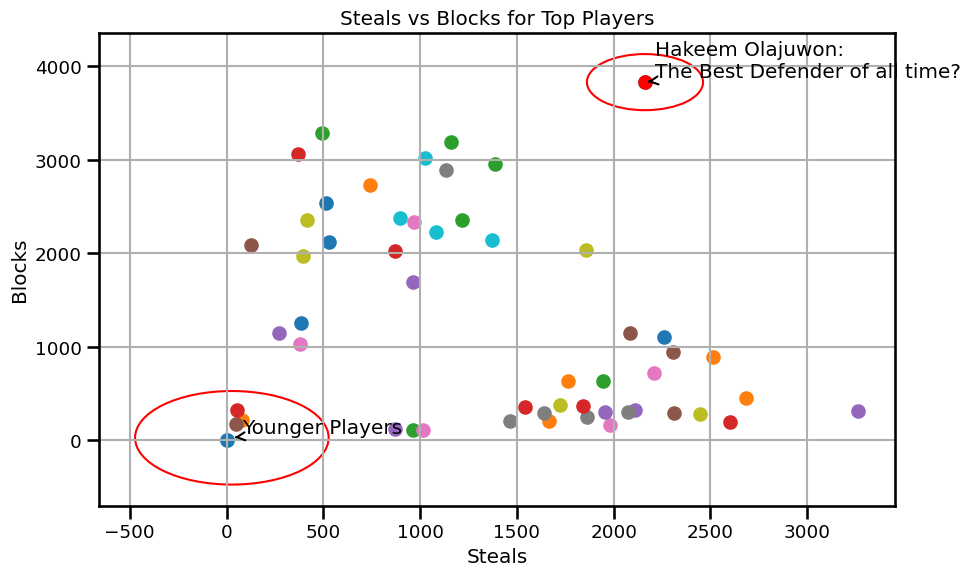

In [133]:
#steals and blocks data
steals = top_steal_block_players_stats['steals']
blocks = top_steal_block_players_stats['blocks']
players = top_steal_block_players_stats.index

#total STOCKs for each player
top_steal_block_players_stats['STOCKs'] = top_steal_block_players_stats['steals'] + top_steal_block_players_stats['blocks']

#player with the most STOCKs
best_defender_player = top_steal_block_players_stats['STOCKs'].idxmax()

#steals and blocks for the "best" defender
best_defender_steals = steals.loc[best_defender_player]
best_defender_blocks = blocks.loc[best_defender_player]


#visualise
plt.figure(figsize=(10, 6))
for player, steal, block in zip(players, steals, blocks):
    plt.scatter(steal, block, label=player)

plt.title('Steals vs Blocks for Top Players')
plt.xlabel('Steals')
plt.ylabel('Blocks')
plt.grid(True)  # Add gridlines

close_to_zero_indices = np.where((np.abs(steals) < 500) & (np.abs(blocks) <  500))
cluster_center = (close_to_zero_indices[0].mean(), close_to_zero_indices[0].mean())
circle = plt.Circle(cluster_center, radius=500, color='red', fill=False)
plt.gca().add_patch(circle)
plt.annotate('Younger Players', xy=cluster_center, xytext=(cluster_center[0] + 50, cluster_center[1] + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

#best defender player's position
plt.scatter(best_defender_steals, best_defender_blocks, color='red', label='Best Defender')
circle = plt.Circle((best_defender_steals, best_defender_blocks), radius=300, color='red', fill=False)
plt.gca().add_patch(circle)
plt.annotate('Hakeem Olajuwon: \nThe Best Defender of all time?', xy=(best_defender_steals, best_defender_blocks), xytext=(best_defender_steals + 50, best_defender_blocks + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.tight_layout()
plt.show()



From this graph, it seems to be pretty obvious that Hakeem Olajuwon may be the greatest defender of all time. We can also see that there are younger players who have just not played as much as games as the others to have as much as blocks and steals as them throughout their careers. These can include Chet Holmgren and Victor Wembanyama, who just got drafted this season. However, the future looks bright for them as they are in this list based off their per game stats, indicating that they are on track to compete with the best players of all time provided they keep this level of basketball up consistently for the rest of their career.

<br>
---Points---

<br>

Hakeem Olajuwon	        55


Victor Wembanyama	    54  


David Robinson          53


Mark Eaton	            52


Anthony Davis	        51


Manute Bol	            50


Marcus Camby	        49


Patrick Ewing           48


Alonzo Mourning	        47


Ben Wallace	            46


Shawn Bradley           45


Michael Jordan	        44


Dikembe Mutombo	        43


Larry Nance	            42


Alvin Robertson	        41


Chet Holmgren	        40


Bill Walton	            39


Micheal Ray Richardson  38


Theo Ratliff	        37


Tim Duncan	            36


Myles Turner            35    


Shaquille O'Neal	    34


Kareem Abdul-Jabbar     33


Walker Kessler	        32    


Hassan Whiteside	    31


Scottie Pippen	        30


Clyde Drexler	        29


Mookie Blaylock	        28


Kevin Garnett	        27


Dwight Howard	        26


Tree Rollins	        25


Lafayette Lever	        24


Slick Watts	            23


Nate McMillan	        22


John Stockton	        21


Maurice Cheeks          20


Allen Iverson	        19


Gus Williams	        18


Magic Johnson	        17


George Johnson	        16


LeBron James	        15


Jason Kidd	            14


Robert Parish	        13


Chris Paul	            12


Ron Lee	                11


Karl Malone	            10


Johnny Moore	        9


Isiah Thomas	        8


Gary Payton             7


Renaldo Major           6   


Ralph Jackson           5


Andre Iguodala	        4


Kobe Bryant	            3


Russell Westbrook	    2


Derek Harper	        1




<br>

The last step in finding out the best defender of all time, is seeing how good these players are at....

<br>

**rebounding**





In [134]:
#players in top_steal_block_players_stats rebounds per game
top_steal_block_players_RPG = playerStats[playerStats['player_name'].isin(top_steal_block_players)]['total_rebounds'].groupby(playerStats['player_name']).sum()
top_steal_block_players_RPG = top_steal_block_players_RPG / total_games_by_player[top_steal_block_players_RPG.index]

top_steal_block_players_RPG = top_steal_block_players_RPG.sort_values(ascending=False)
top_steal_block_players_RPG = pd.DataFrame(top_steal_block_players_RPG)
top_steal_block_players_RPG.columns = ['RPG']

top_steal_block_players_RPG


,RPG
player_name,
Dwight Howard,11.776973
Kareem Abdul-Jabbar,11.179487
Hakeem Olajuwon,11.105008
Shaquille O'Neal,10.852527
Tim Duncan,10.841236
Hassan Whiteside,10.808219
David Robinson,10.635258
Anthony Davis,10.615912
Bill Walton,10.519231


---Points---

<br>


Dwight Howard           55 + 26 = 81


Kareem Abdul-Jabbar	    54 + 33 = 87


Hakeem Olajuwon	        53 + 55 = 108 


Shaquille O'Neal	    52 + 34 = 86


Tim Duncan	            51 + 36 = 87


Hassan Whiteside	    50 + 31 = 81


David Robinson          49 + 53 = 102


Anthony Davis	        48 + 51 = 99


Bill Walton	            47 + 39 = 86


Victor Wembanyama       46 + 54 = 100


Dikembe Mutombo         45 + 43 = 88


Karl Malone             44 + 10 = 54


Kevin Garnett           43 + 27 = 60


Marcus Camby            42 + 49 = 91


Patrick Ewing           41 + 48 = 89


Ben Wallace             40 + 46 = 86


Robert Parish	        39 + 13 = 52


Alonzo Mourning	        38 + 47 = 85


Walker Kessler	        37 + 32 = 59


Larry Nance             36 + 42 = 78


Mark Eaton              35 + 52 = 87


Chet Holmgren           34 + 40 = 74


LeBron James            33 + 15 = 48


Magic Johnson	        32 + 17 = 49


Russell Westbrook	    31 + 2 = 33


Myles Turner	        30 + 35 = 65


Scottie Pippen	        29 + 30 = 59


Shawn Bradley	        28 + 45 = 73 


Jason Kidd	            27 + 14 = 41


Michael Jordan	        26 + 44 = 70


Clyde Drexler	        25 + 29 = 54


George Johnson          24 + 16 = 40


Lafayette Lever	        23 + 24 = 47


Tree Rollins	        22 + 25 = 47


Theo Ratliff	        21 + 37 = 58


Micheal Ray Richardson	20 + 38 = 58


Kobe Bryant             19 + 3 = 22


Alvin Robertson	        18 + 41 = 59


Andre Iguodala	        17 + 4 = 21


Chris Paul	            16 + 12 = 28


Manute Bol	            15 + 50 = 65


Mookie Blaylock         14 + 28 = 42


Nate McMillan	        13 + 22 = 35


Gary Payton             12 + 7 = 19


Allen Iverson	        11 + 19 = 30


Isiah Thomas	        10 + 8 = 18


Slick Watts	            9 + 23 = 32


Johnny Moore	        8 + 9 = 17


Maurice Cheeks	        7 + 20 = 27    


Ron Lee	                6 + 11 = 17


John Stockton	        5 + 21 = 26


Gus Williams	        4 + 18 = 22


Derek Harper	        3 + 1 = 4


Renaldo Major	        2 + 6 = 8


Ralph Jackson	        1 + 5 = 6

<br>

From our analysis and point allocation, the greatest defender of all time is ***Hakeem Olajuwon***

To end the analysis of this research question, an interesting observation I have made is that for the scoring aspect, we had much more graphs and code as compared to the playmaking and defensive aspects of the game. I think this further backs up the point that what this game really is about at the end of the day is putting the ball in the net.


***Final Results***

1)Greatest Scorer of all Time: ***Kevin Durant***

2)Greatest Playmaker of all Time: ***Chris Paul***

3)Greatest Defender of all Time: ***Hakeem Olajuwon***